In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import t as t_dist

from functions import *
from config import (MATPLOTLIB_PARAMS)

plt.rcParams.update(MATPLOTLIB_PARAMS)

# BENCHMARKS - Isolated 

In [2]:
df_kems = kem_data_process("data/kem_bench_oqs_200_iter_20250122.csv")

df_kems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0      frodo640aes          1       3.842       0.753       0.635   
1      frodo640aes          2       0.433       0.562       0.492   
2      frodo640aes          3       0.347       0.543       0.408   
3      frodo640aes          4       0.281       0.375       0.333   
4      frodo640aes          5       0.251       0.345       0.311   
...            ...        ...         ...         ...         ...   
10395       hqc256        196       5.749      10.846      16.547   
10396       hqc256        197       5.432      10.817      16.401   
10397       hqc256        198       5.399      10.740      16.284   
10398       hqc256        199       5.487      10.741      16.439   
10399       hqc256        200       5.426      10.824      16.290   

       TotalTime(ms)  
0              5.230  
1              1.487  
2              1.298  
3              0.989  
4              0.907  
...              ...  
10395         33.142  
10396         32.650  
10397         32.423  
10398         32.667  
10399         32.540  

[3600 rows x 6 columns]

In [3]:
df_qkdkems = kem_data_process("data/kem_bench_qkdkemprovider_100_iter_20250122.csv")

df_qkdkems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0     qkd_frodo640aes          1       7.696       1.280       0.879   
1     qkd_frodo640aes          2       0.797       0.805       0.701   
2     qkd_frodo640aes          3       0.493       0.615       0.492   
3     qkd_frodo640aes          4       0.477       0.484       0.392   
4     qkd_frodo640aes          5       0.329       0.402       0.347   
...               ...        ...         ...         ...         ...   
1795       qkd_hqc256         96       5.788      11.584      17.529   
1796       qkd_hqc256         97       5.785      11.683      17.588   
1797       qkd_hqc256         98       5.775      11.561      17.453   
1798       qkd_hqc256         99       5.804      11.521      17.411   
1799       qkd_hqc256        100       5.818      11.528      17.390   

      TotalTime(ms)  
0             9.855  
1             2.303  
2             1.600  
3             1.353  
4             1.078  
...             ...  
1795         34.901  
1796         35.056  
1797         34.789  
1798         34.736  
1799         34.736  

[1800 rows x 6 columns]

In [4]:
# Count unique algorithms with
std_algorithms = df_kems['Algorithm'].unique()

print(f"Number of distinct algorithms: {len(std_algorithms)}")
print("\nPQC Algorithms found:")
for algo in sorted(std_algorithms):
    print(f"- {algo}")

Number of distinct algorithms: 18

PQC Algorithms found:
- bikel1
- bikel3
- bikel5
- frodo1344aes
- frodo1344shake
- frodo640aes
- frodo640shake
- frodo976aes
- frodo976shake
- hqc128
- hqc192
- hqc256
- kyber1024
- kyber512
- kyber768
- mlkem1024
- mlkem512
- mlkem768


In [5]:
# Count unique algorithms with qkd_ prefix
qkd_algorithms = df_qkdkems[df_qkdkems['Algorithm'].str.startswith('qkd_')]['Algorithm'].unique()

print(f"Number of distinct QKD algorithms: {len(qkd_algorithms)}")
print("\nQKD-PQC algorithms found:")
for algo in sorted(qkd_algorithms):
    print(f"- {algo}")

Number of distinct QKD algorithms: 18

QKD-PQC algorithms found:
- qkd_bikel1
- qkd_bikel3
- qkd_bikel5
- qkd_frodo1344aes
- qkd_frodo1344shake
- qkd_frodo640aes
- qkd_frodo640shake
- qkd_frodo976aes
- qkd_frodo976shake
- qkd_hqc128
- qkd_hqc192
- qkd_hqc256
- qkd_kyber1024
- qkd_kyber512
- qkd_kyber768
- qkd_mlkem1024
- qkd_mlkem512
- qkd_mlkem768


In [ ]:
df_kems_stats = kem_data_summary(df_kems, warmup=2)

df_kems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                        
bikel1                    198            0.137           0.010   
bikel3                    198            0.377           0.060   
bikel5                    198            0.881           0.058   
frodo1344aes              198            0.738           0.029   
frodo1344shake            198            2.457           0.078   
frodo640aes               198            0.248           0.022   
frodo640shake             198            0.700           0.029   
frodo976aes               198            0.408           0.018   
frodo976shake             198            1.397           0.046   
hqc128                    198            1.026           0.027   
hqc192                    198            3.107           0.106   
hqc256                    198            5.439           0.118   
kyber1024                 198            0.015           0.001   
kyber512                  198            0.007           0.006   
kyber768                  198            0.011           0.002   
mlkem1024                 198            0.014           0.002   
mlkem512                  198            0.007           0.000   
mlkem768                  198            0.011           0.001   

                KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                         
bikel1                   0.129           0.222            0.031   
bikel3                   0.356           1.113            0.071   
bikel5                   0.841           1.439            0.139   
frodo1344aes             0.704           0.857            1.003   
frodo1344shake           2.342           2.730            2.589   
frodo640aes              0.228           0.347            0.343   
frodo640shake            0.659           0.796            0.761   
frodo976aes              0.396           0.502            0.587   
frodo976shake            1.315           1.571            1.478   
hqc128                   0.974           1.110            2.036   
hqc192                   2.949           3.465            6.202   
hqc256                   5.360           6.205           10.879   
kyber1024                0.015           0.023            0.019   
kyber512                 0.007           0.091            0.008   
kyber768                 0.011           0.036            0.013   
mlkem1024                0.013           0.041            0.013   
mlkem512                 0.007           0.007            0.006   
mlkem768                 0.011           0.027            0.010   

                Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                        
bikel1                   0.002           0.030           0.051   
bikel3                   0.014           0.067           0.174   
bikel5                   0.015           0.131           0.331   
frodo1344aes             0.033           0.978           1.145   
frodo1344shake           0.083           2.472           2.896   
frodo640aes              0.021           0.314           0.543   
frodo640shake            0.032           0.711           0.875   
frodo976aes              0.021           0.574           0.680   
frodo976shake            0.051           1.403           1.672   
hqc128                   0.060           1.930           2.222   
hqc192                   0.198           5.896           7.084   
hqc256                   0.216          10.731          12.443   
kyber1024                0.009           0.018           0.106   
kyber512                 0.006           0.007           0.098   
kyber768                 0.000           0.013           0.015   
mlkem1024                0.001           0.013           0.016   
mlkem512                 0.006           0.006           0.097   
mlkem768                 0.000           0.010           0.010   

                Decaps(ms)_mean  

In [ ]:
df_qkdkems_stats = kem_data_summary(df_qkdkems, warmup=2)

df_qkdkems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                            
qkd_bikel1                     98            0.180           0.005   
qkd_bikel3                     98            0.422           0.008   
qkd_bikel5                     98            0.950           0.030   
qkd_frodo1344aes               98            0.758           0.015   
qkd_frodo1344shake             98            2.545           0.064   
qkd_frodo640aes                98            0.297           0.045   
qkd_frodo640shake              98            0.739           0.046   
qkd_frodo976aes                98            0.471           0.032   
qkd_frodo976shake              98            1.482           0.065   
qkd_hqc128                     98            1.076           0.011   
qkd_hqc192                     98            3.210           0.047   
qkd_hqc256                     98            5.811           0.080   
qkd_kyber1024                  98            0.055           0.004   
qkd_kyber512                   98            0.046           0.003   
qkd_kyber768                   98            0.050           0.001   
qkd_mlkem1024                  98            0.055           0.004   
qkd_mlkem512                   98            0.046           0.002   
qkd_mlkem768                   98            0.050           0.004   

                    KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                             
qkd_bikel1                   0.176           0.211            0.068   
qkd_bikel3                   0.416           0.462            0.108   
qkd_bikel5                   0.915           1.057            0.180   
qkd_frodo1344aes             0.739           0.802            1.026   
qkd_frodo1344shake           2.477           2.819            2.690   
qkd_frodo640aes              0.257           0.493            0.387   
qkd_frodo640shake            0.692           0.846            0.800   
qkd_frodo976aes              0.433           0.613            0.655   
qkd_frodo976shake            1.413           1.638            1.592   
qkd_hqc128                   1.065           1.118            2.108   
qkd_hqc192                   3.172           3.462            6.361   
qkd_hqc256                   5.761           6.237           11.588   
qkd_kyber1024                0.053           0.082            0.053   
qkd_kyber512                 0.043           0.073            0.043   
qkd_kyber768                 0.049           0.053            0.048   
qkd_mlkem1024                0.052           0.077            0.049   
qkd_mlkem512                 0.045           0.058            0.041   
qkd_mlkem768                 0.048           0.077            0.045   

                    Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                            
qkd_bikel1                   0.003           0.066           0.090   
qkd_bikel3                   0.004           0.105           0.134   
qkd_bikel5                   0.008           0.173           0.206   
qkd_frodo1344aes             0.021           1.012           1.097   
qkd_frodo1344shake           0.059           2.624           2.900   
qkd_frodo640aes              0.042           0.344           0.615   
qkd_frodo640shake            0.049           0.745           0.906   
qkd_frodo976aes              0.043           0.608           0.765   
qkd_frodo976shake            0.083           1.510           2.019   
qkd_hqc128                   0.014           2.094           2.159   
qkd_hqc192                   0.073           6.078           6.731   
qkd_hqc256                   0.098          11.514          12.144   
qkd_kyber1024                0.003           0.051           0.073   
qkd_kyber512                 0.002           0.040           0.055   
qkd_kyber768                 0.001           0.046           0.057   
qkd_mlke

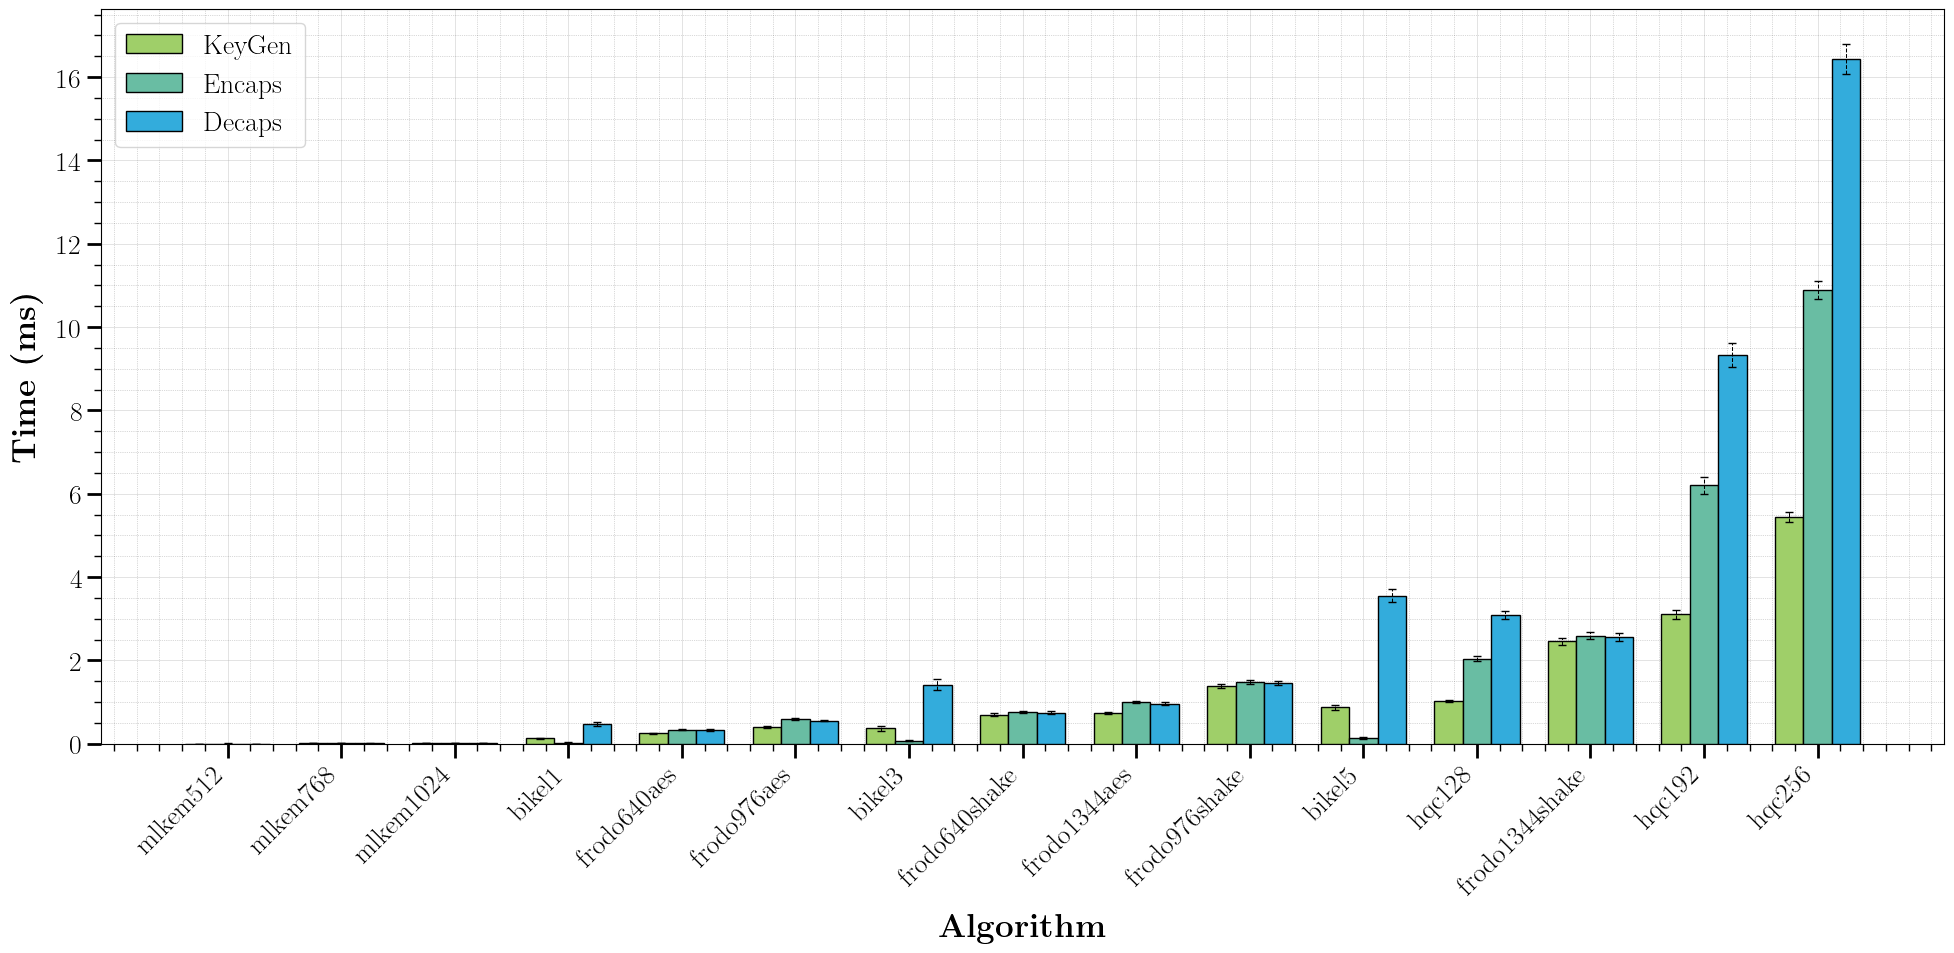

In [8]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_ops_times.pdf", y_start=None)

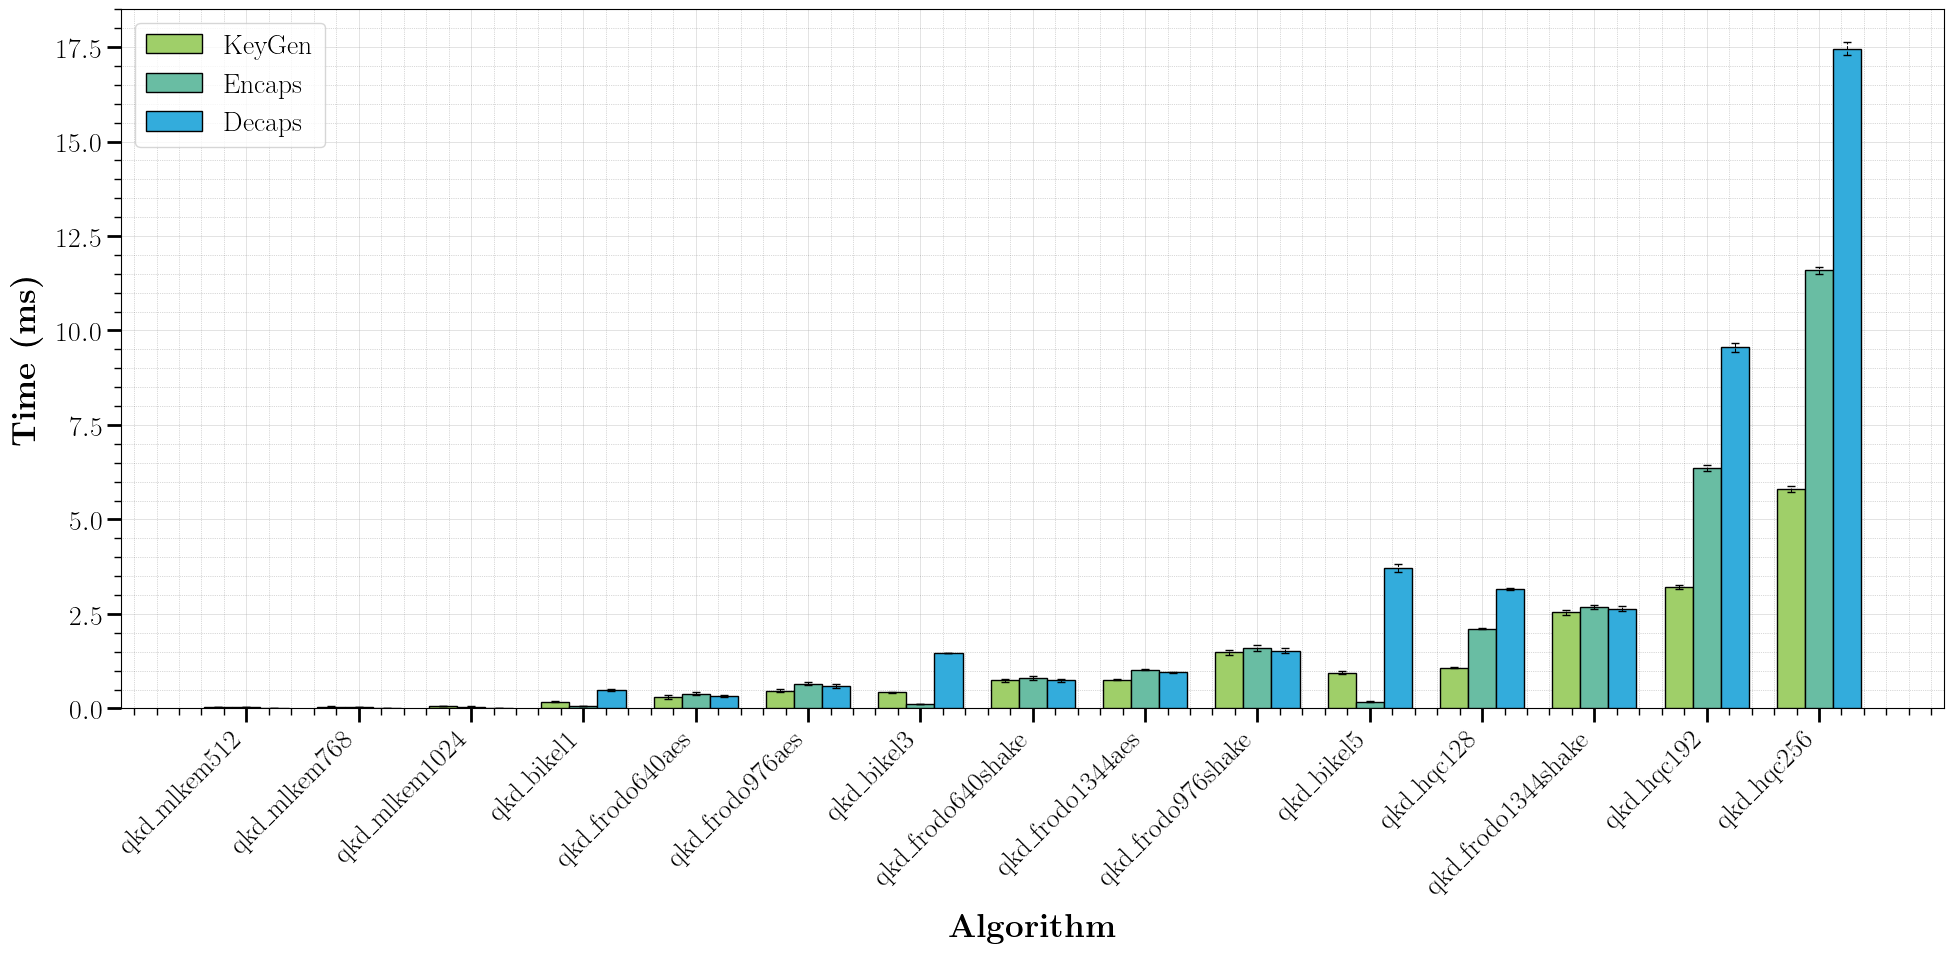

In [9]:
plot_kem_times(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_ops_times.pdf", y_start=None)

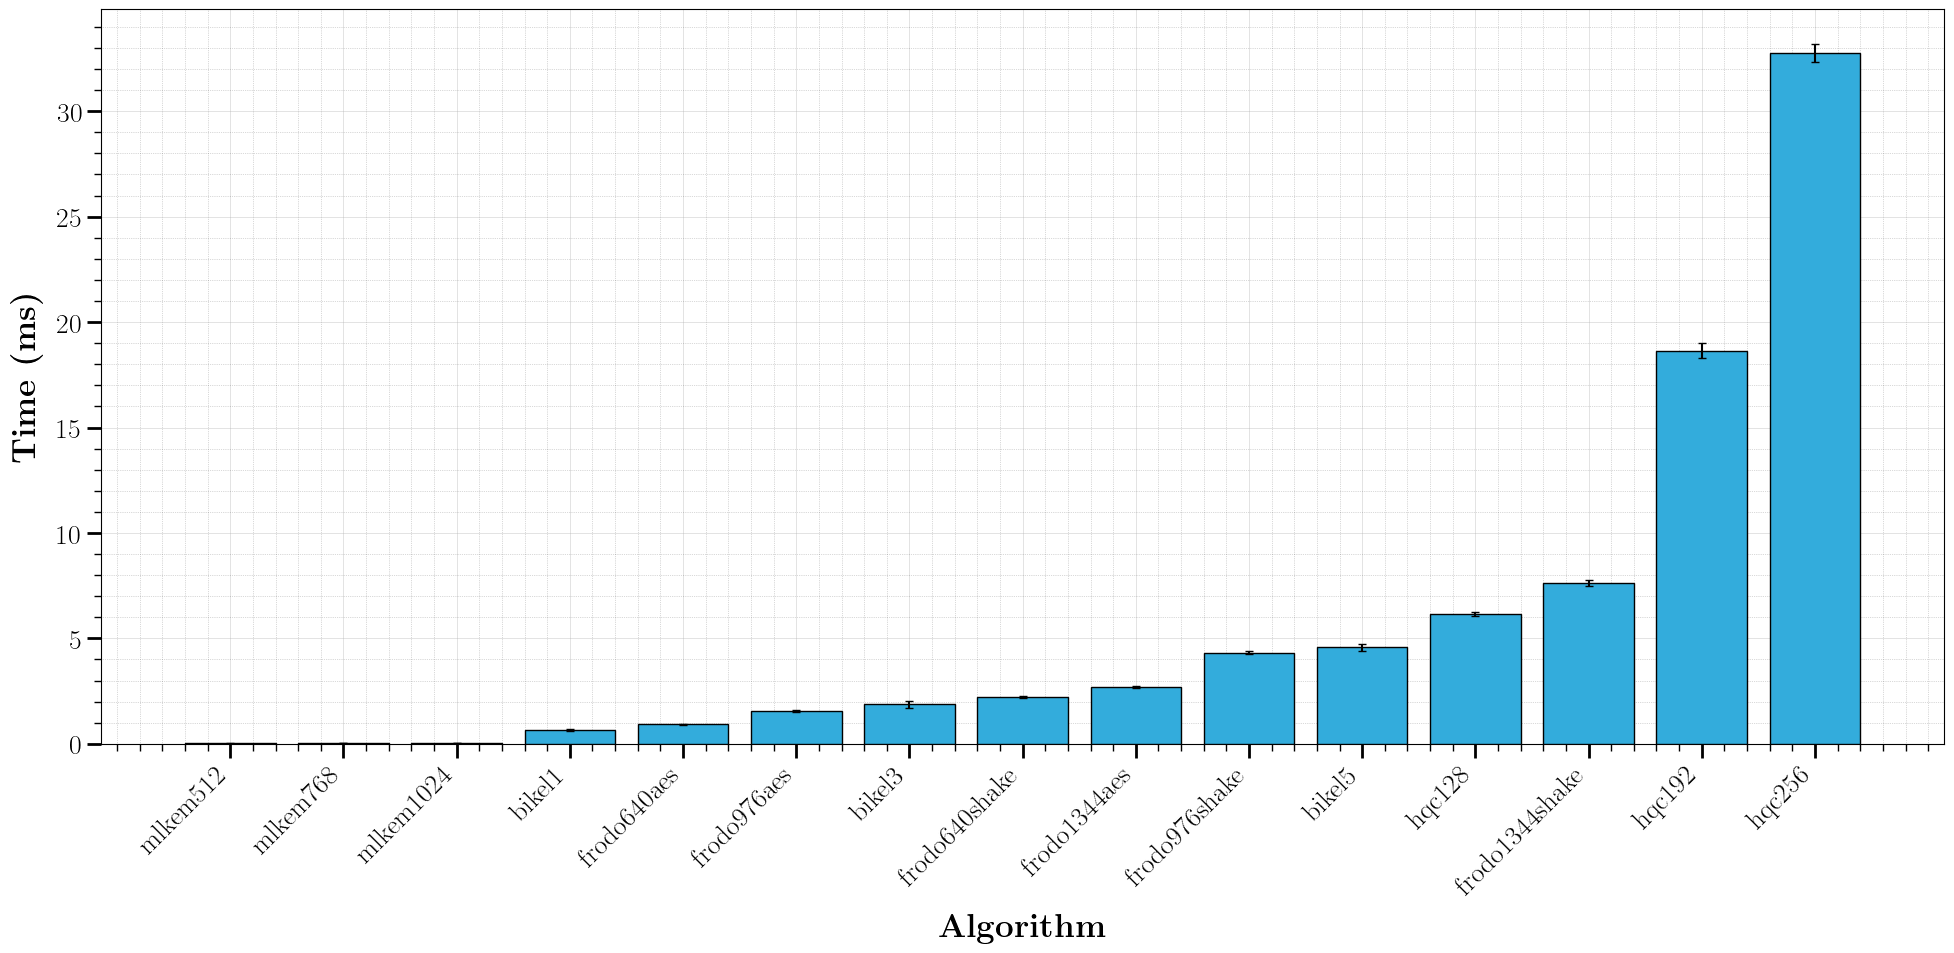

In [10]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", plot_title="kems_total_times.pdf", y_start=None)

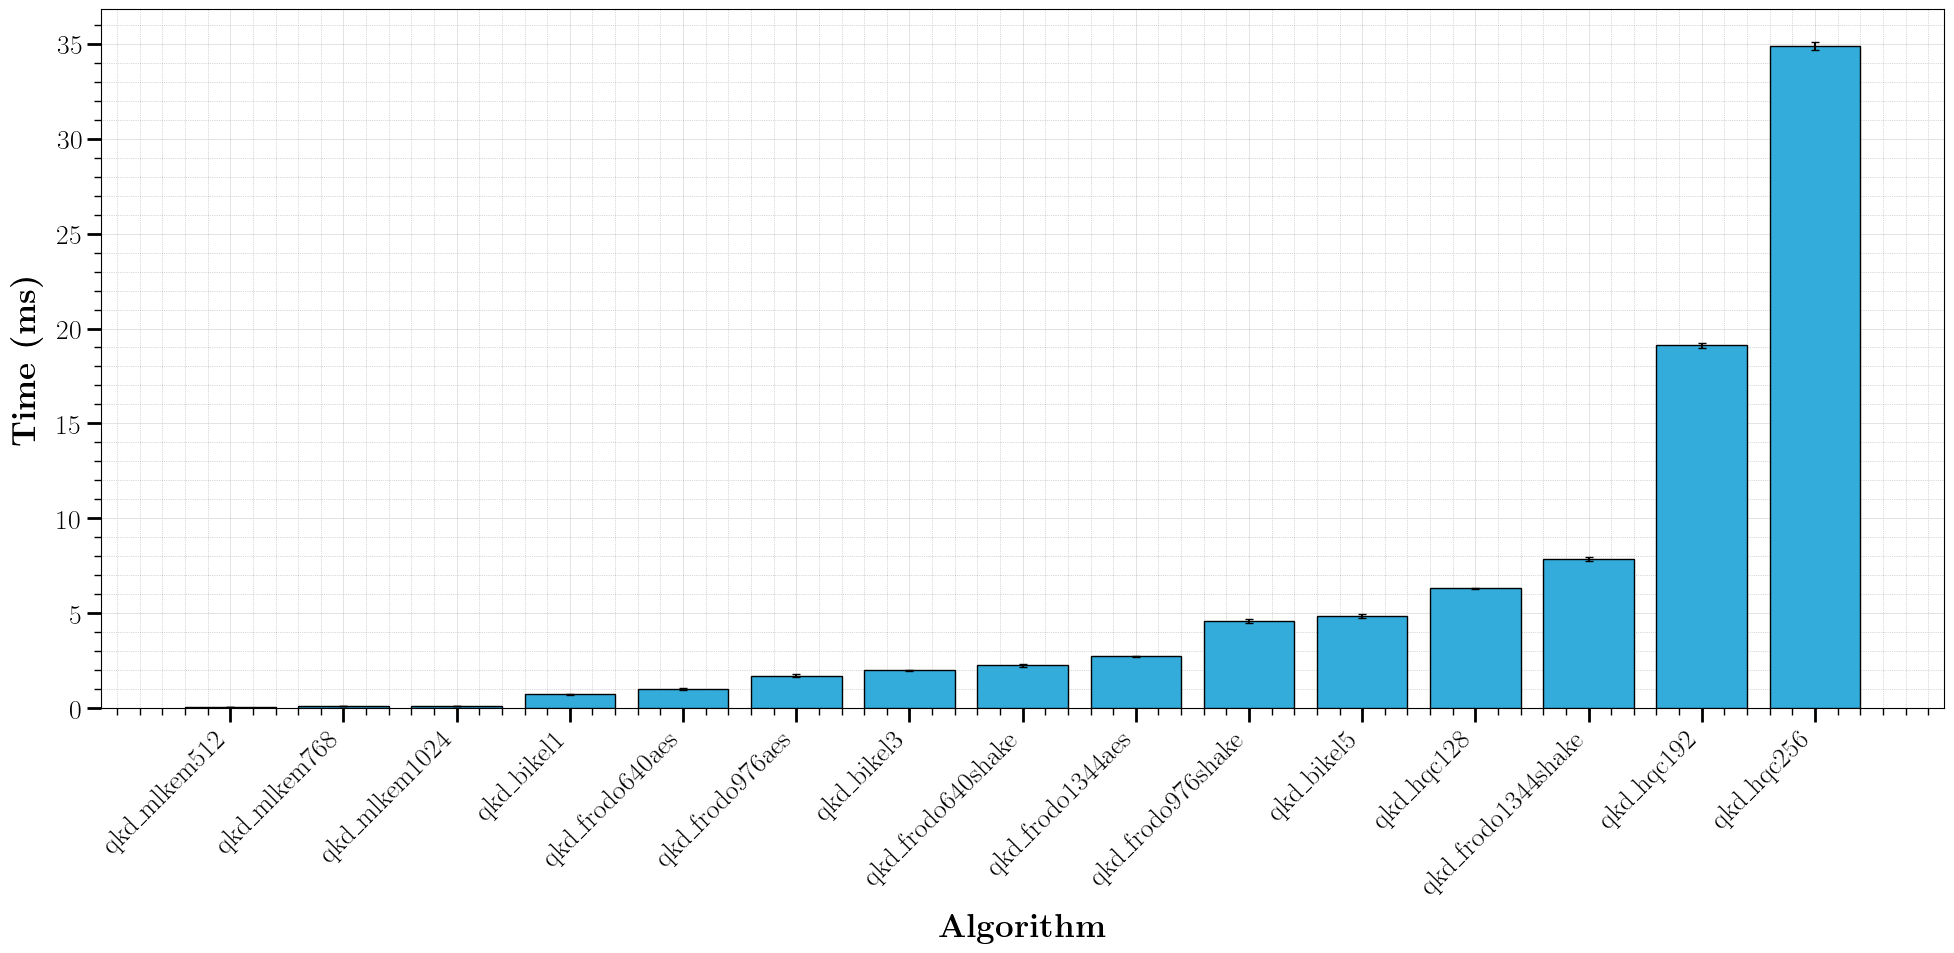

In [11]:
plot_kem_total_times(df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_total_times.pdf", y_start=None)

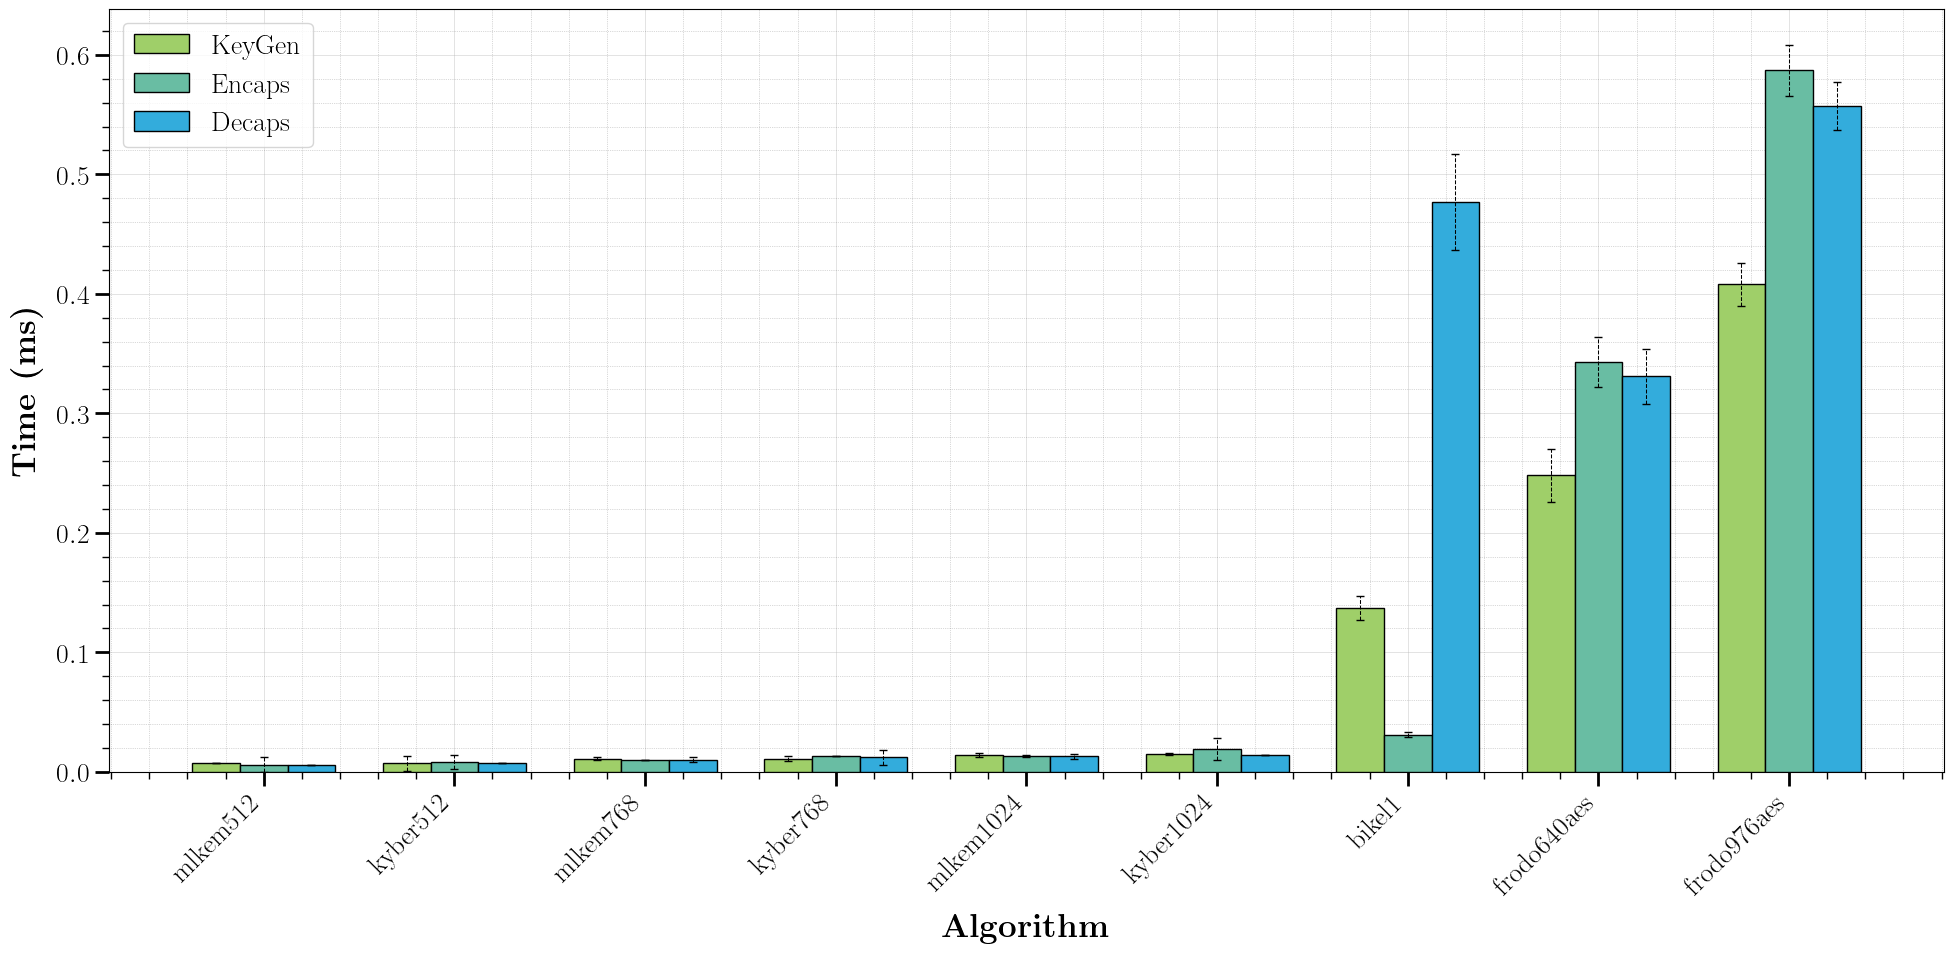

In [12]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_fast_times.pdf")

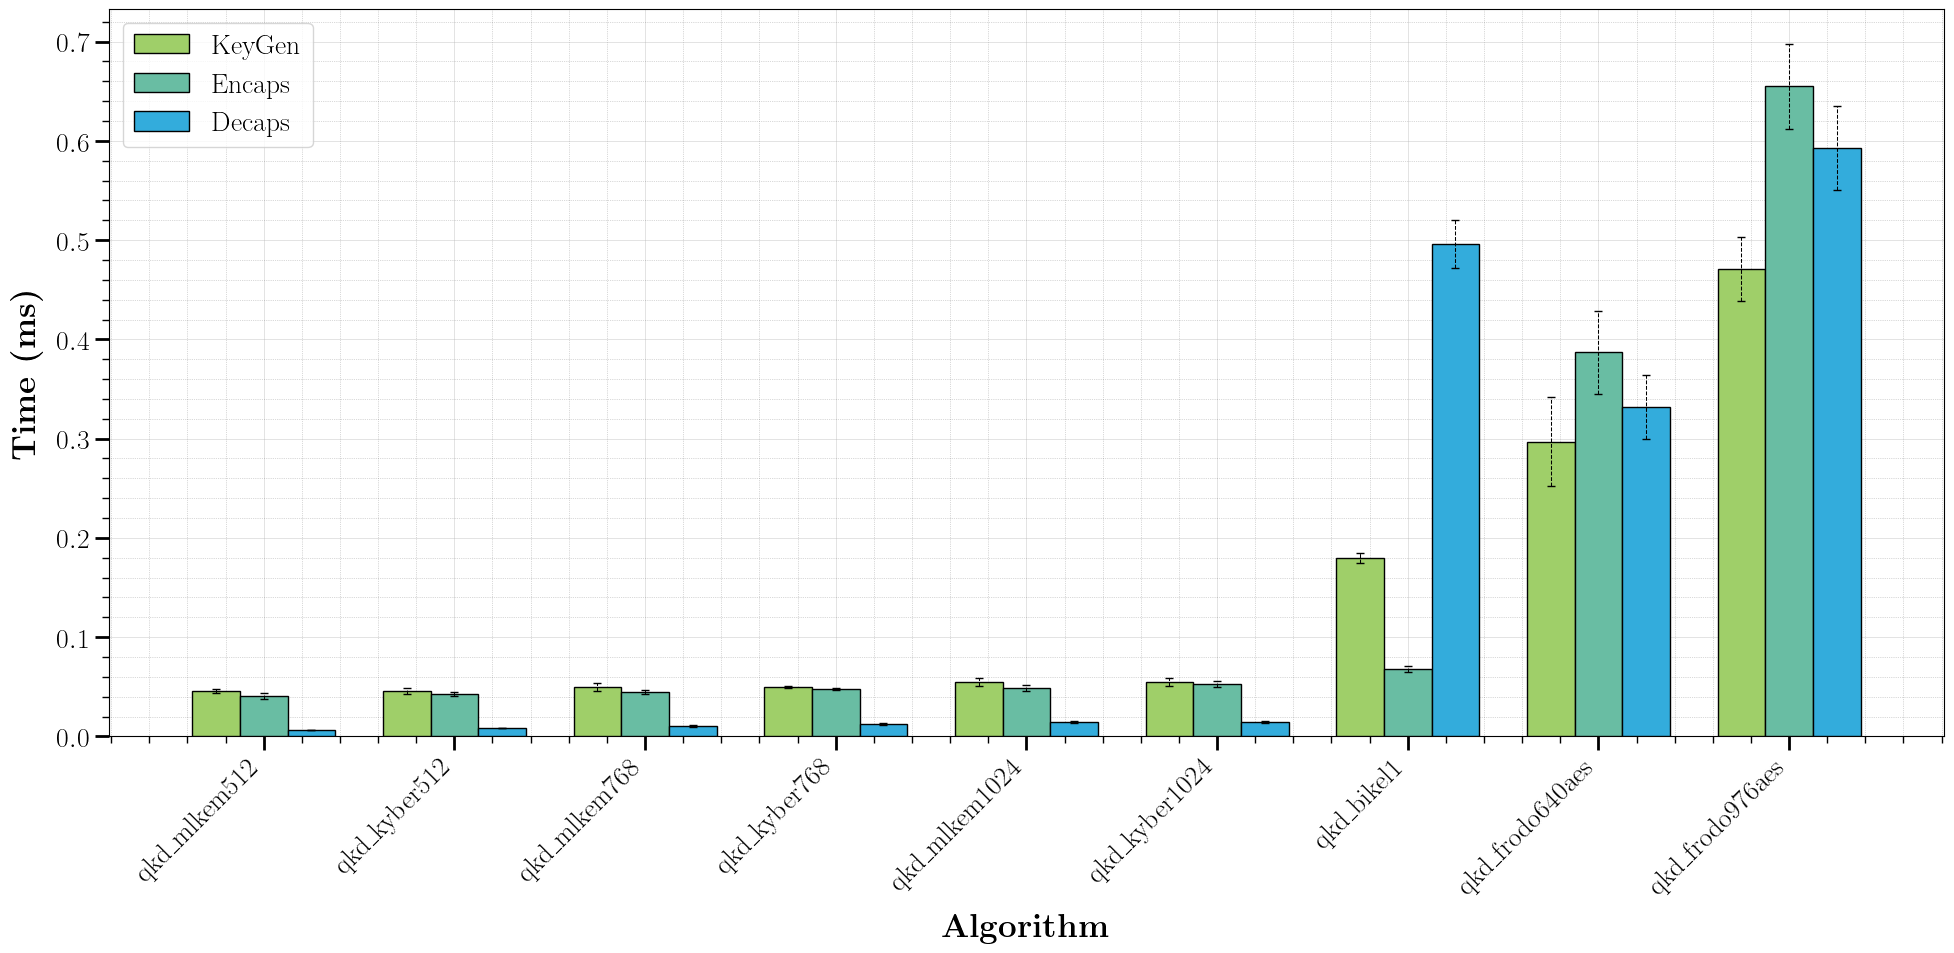

In [13]:
plot_kems_fast(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_fast_times.pdf")

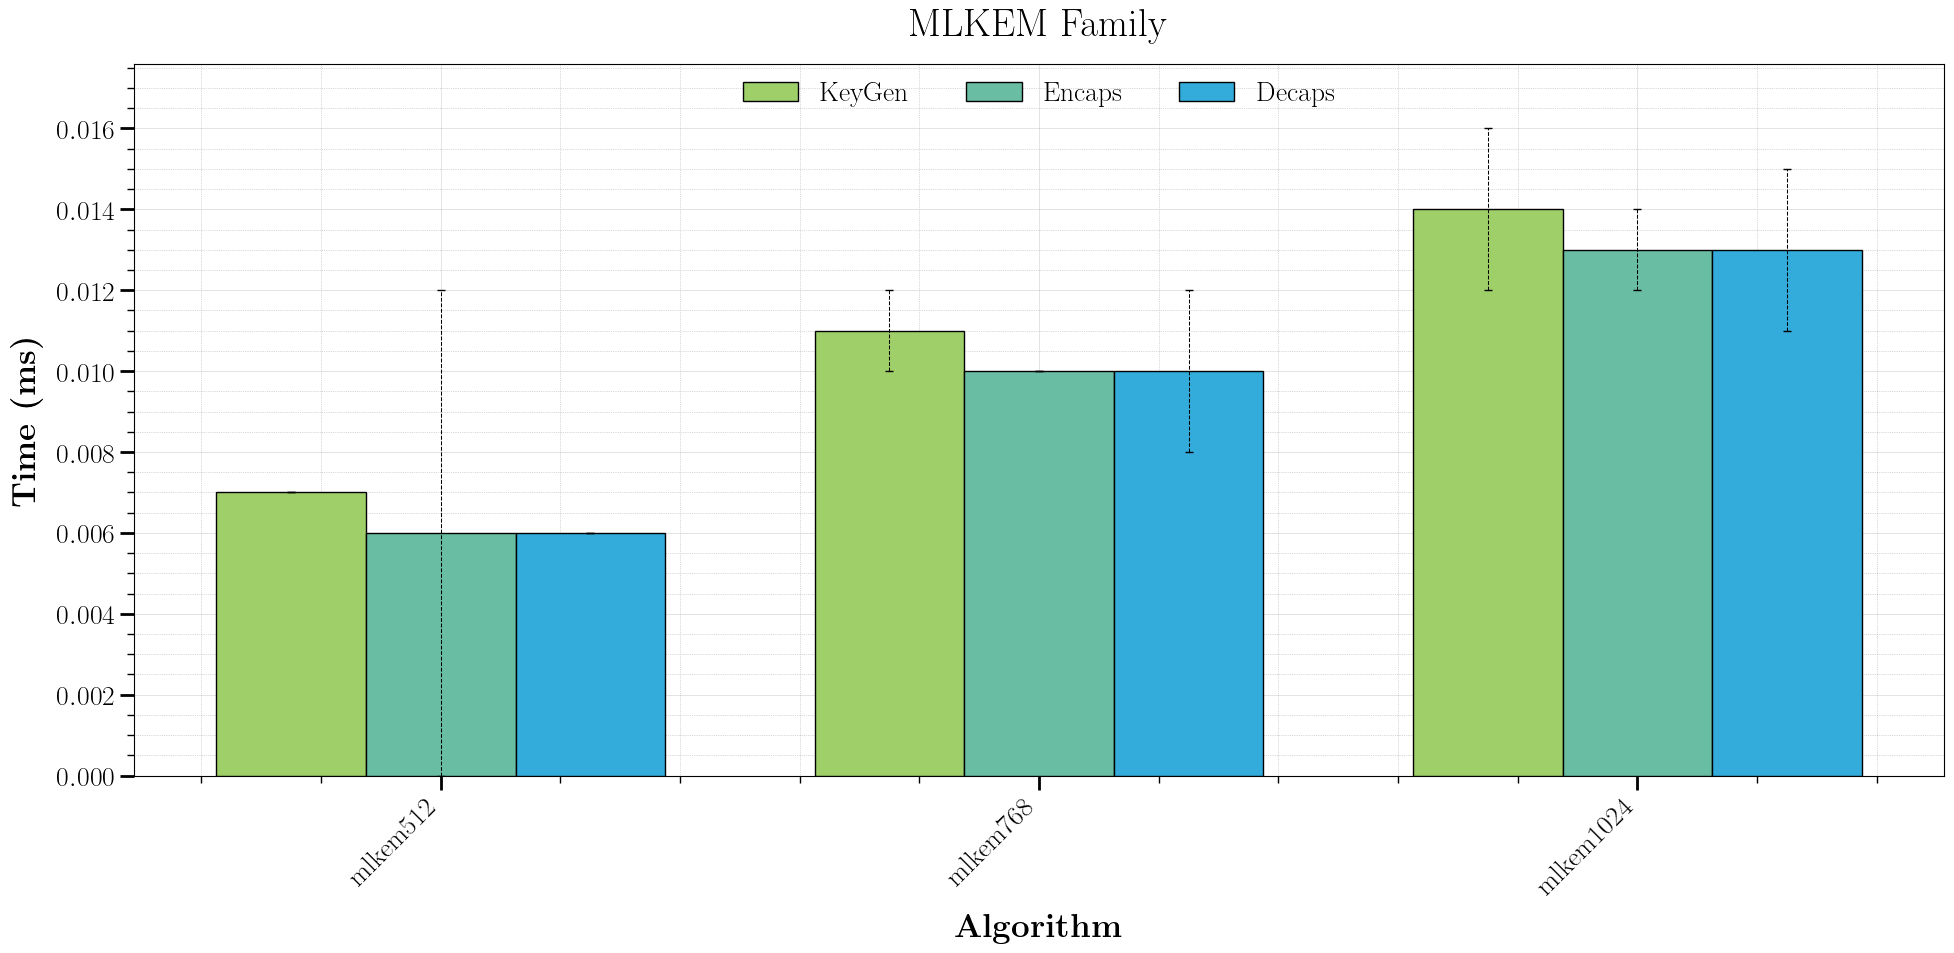

In [14]:
plot_kem_family(input_df=df_kems_stats, family='mlkem', error_suffix="_std", plot_title="mlkem_times.pdf", log_scale=False)

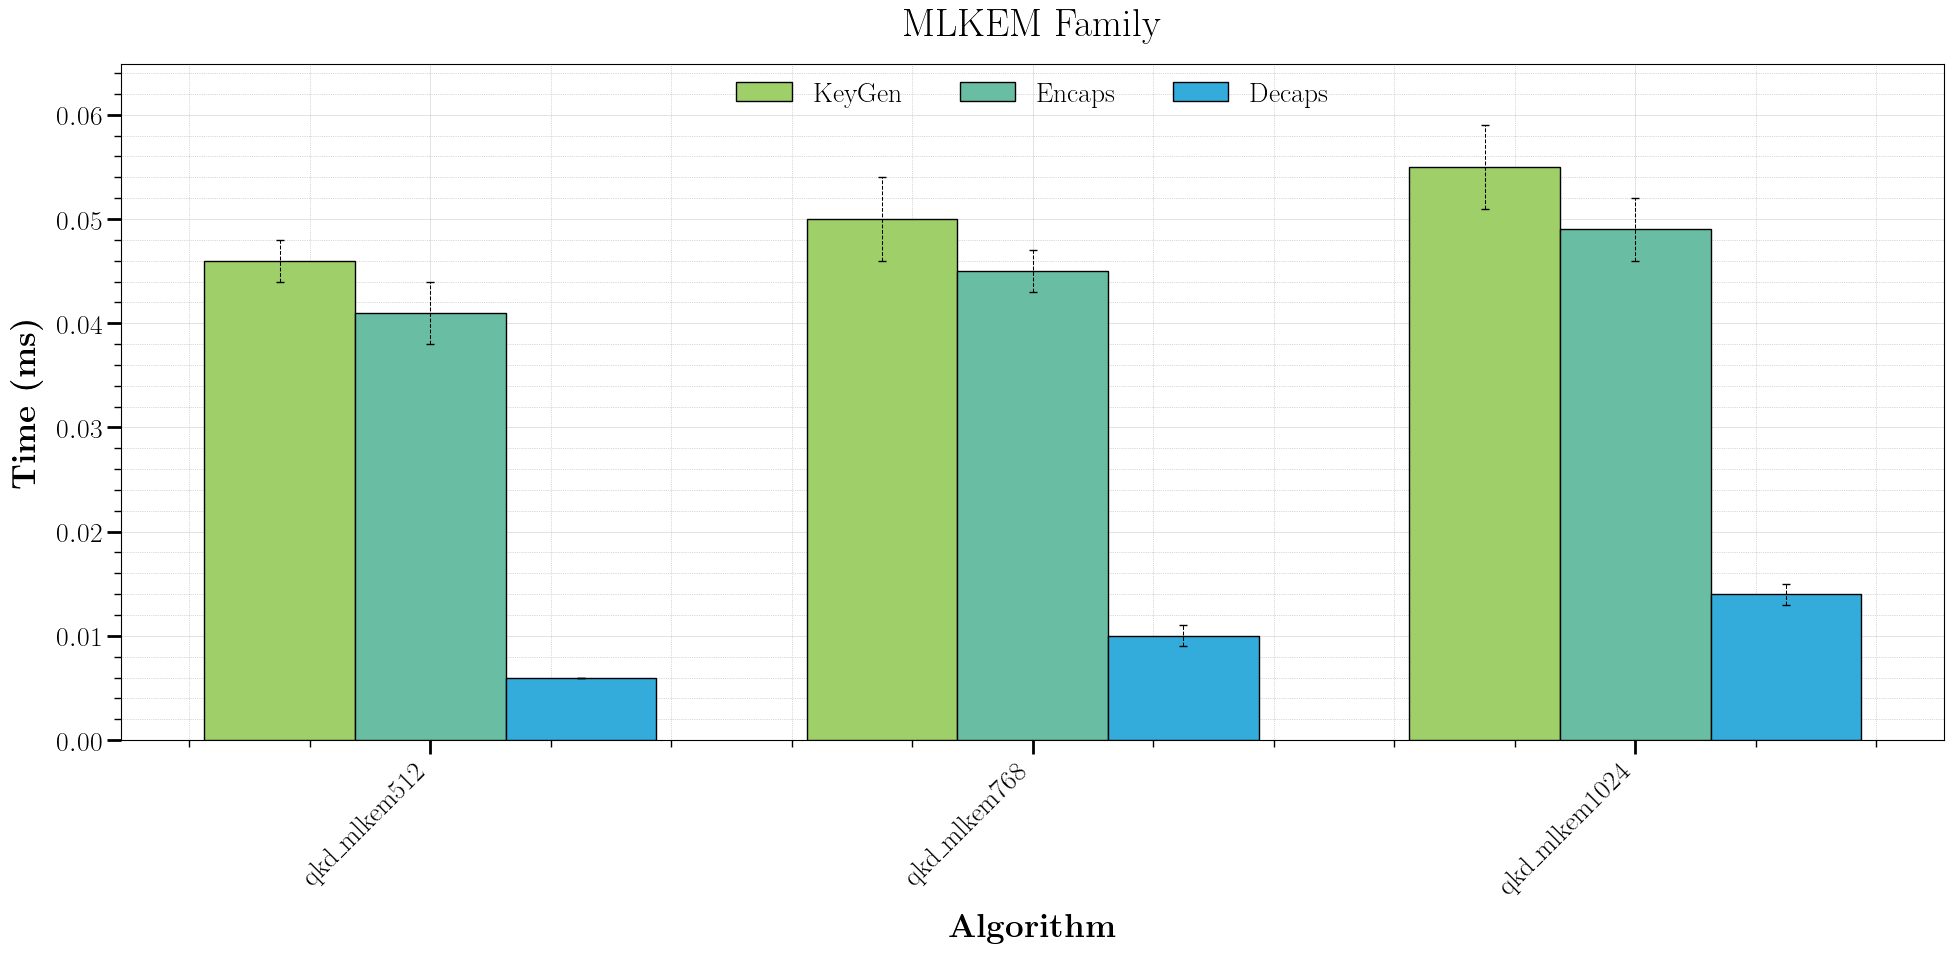

In [15]:
plot_kem_family(input_df=df_qkdkems_stats, family='mlkem', error_suffix="_std", plot_title="qkdmlkem_times.pdf", log_scale=False)

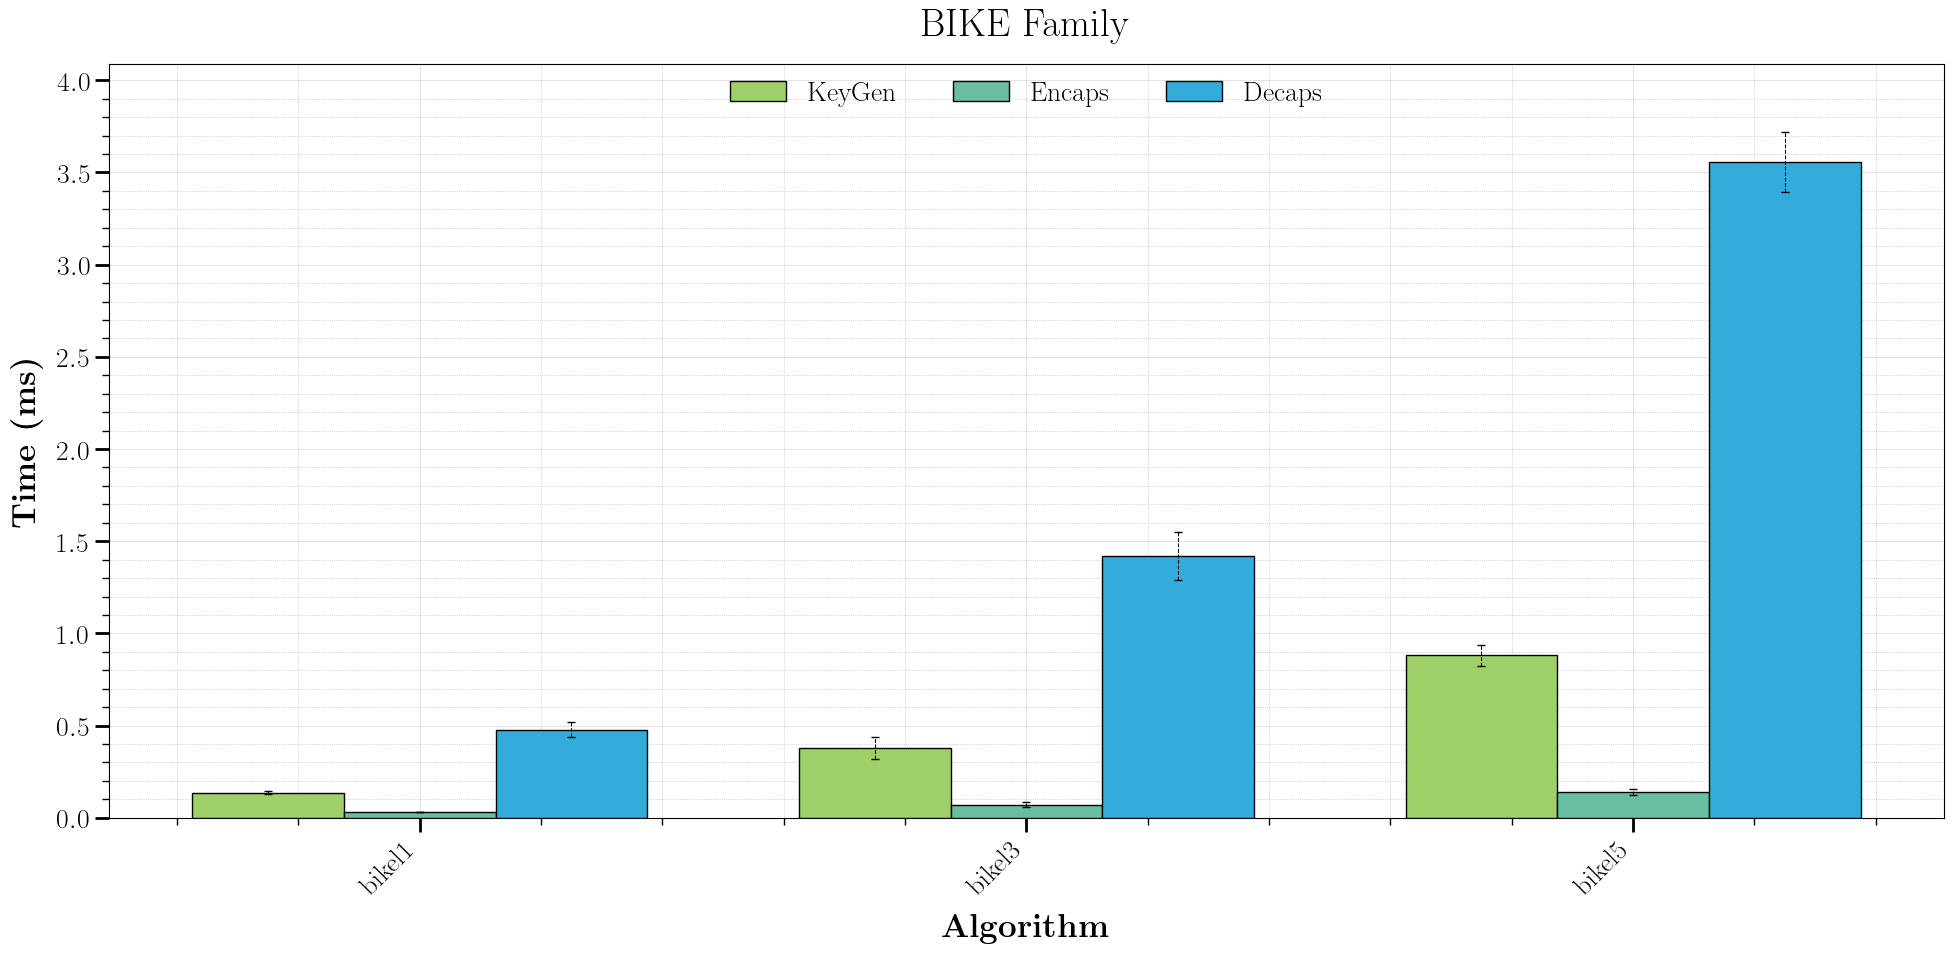

In [16]:
plot_kem_family(input_df=df_kems_stats, family='bike', error_suffix="_std", plot_title="bike_times.pdf", log_scale=False)

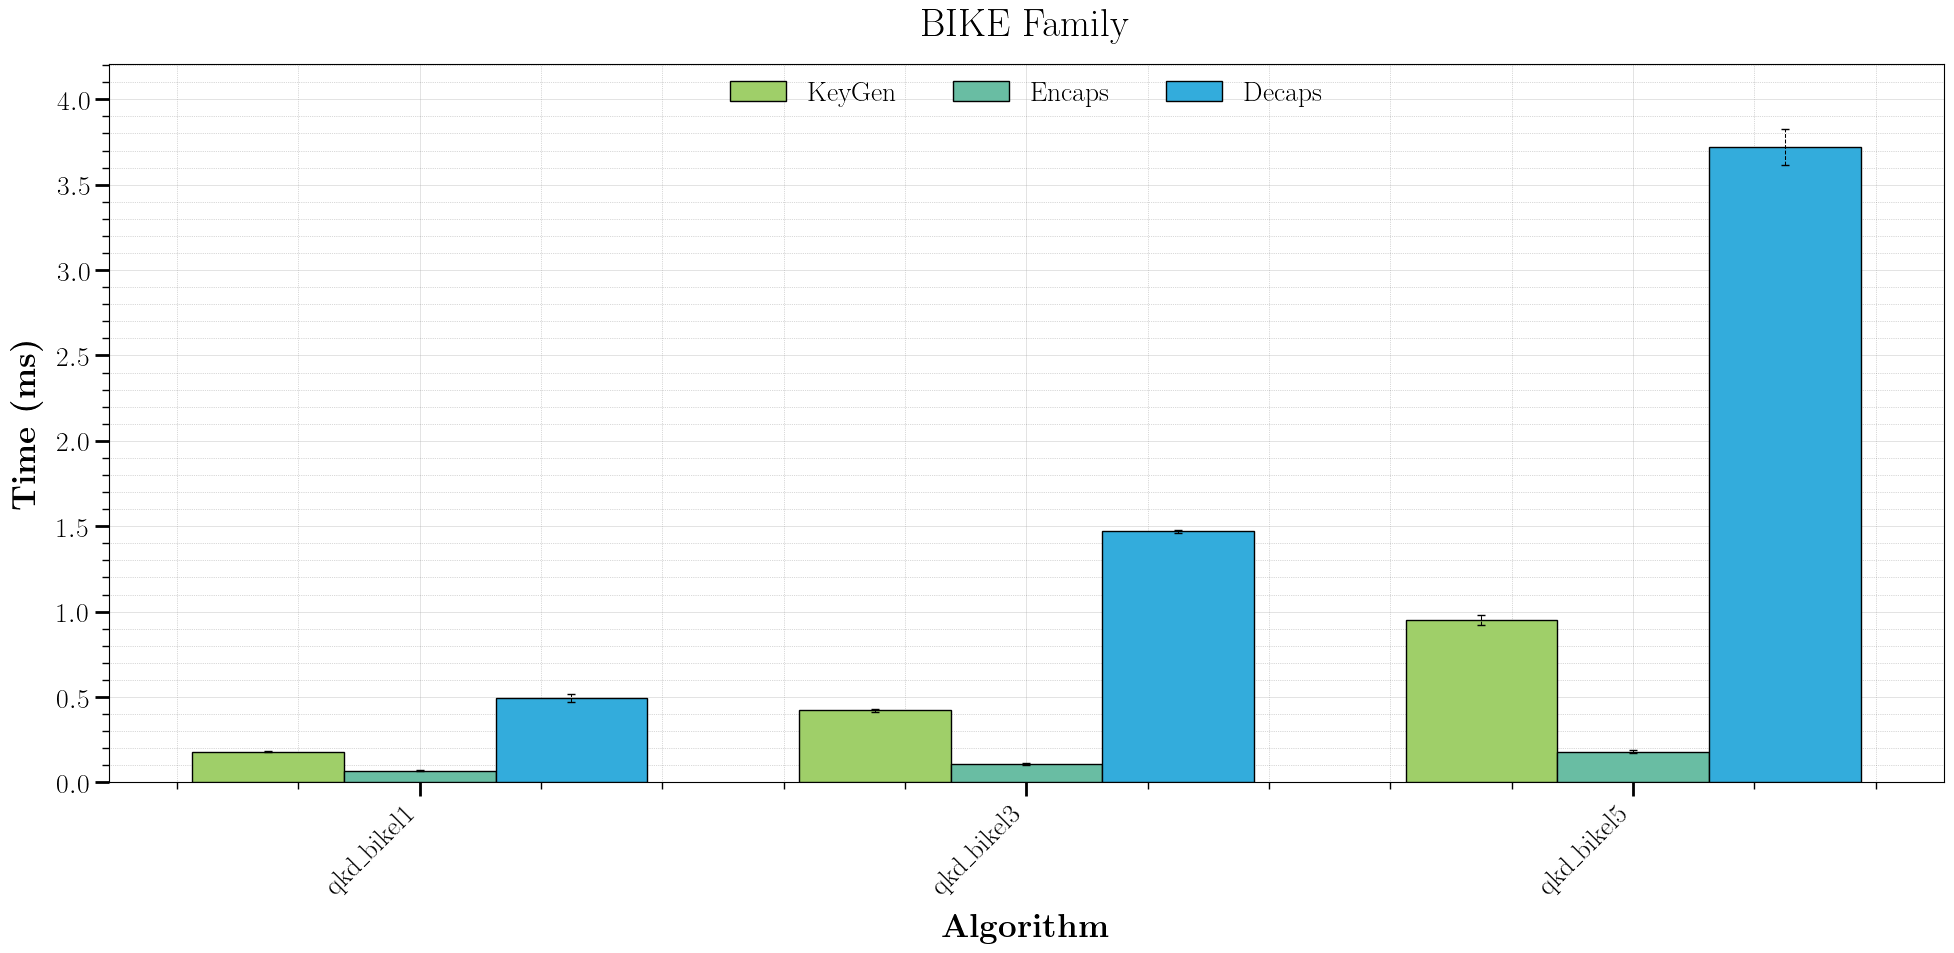

In [17]:
plot_kem_family(input_df=df_qkdkems_stats, family='bike', error_suffix="_std", plot_title="qkdbike_times.pdf", log_scale=False)

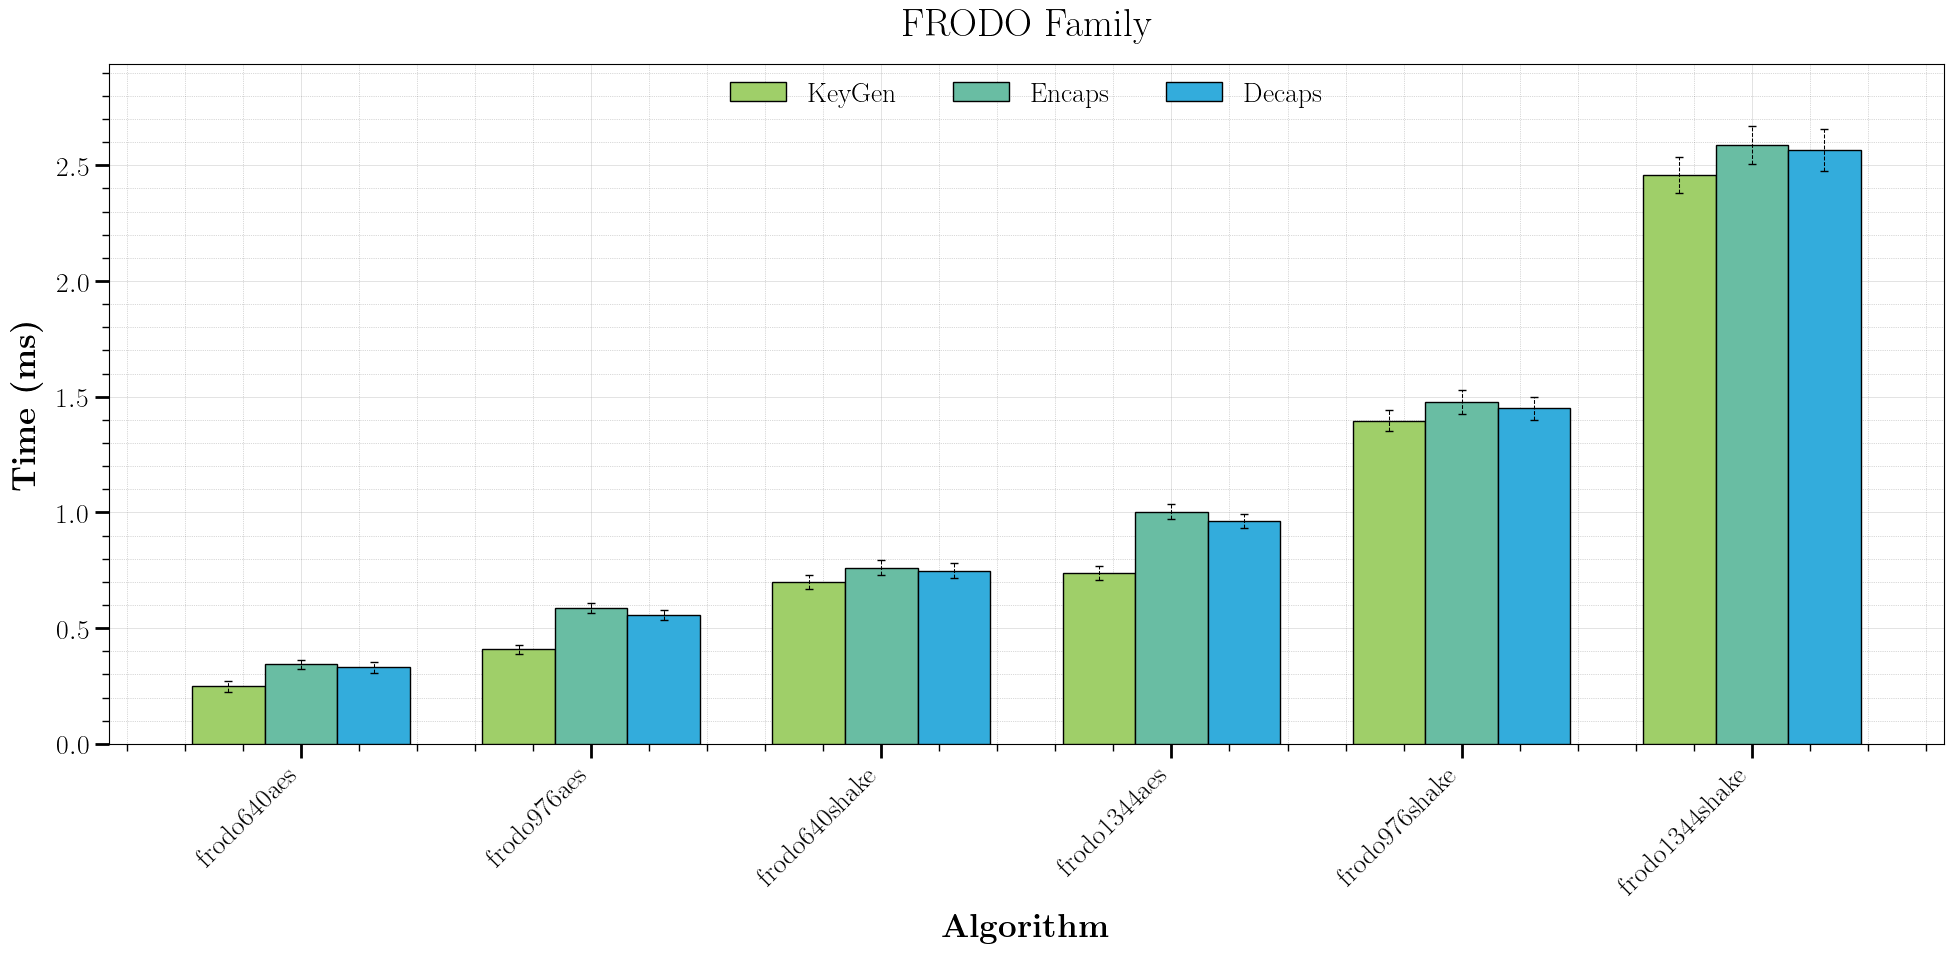

In [18]:
plot_kem_family(input_df=df_kems_stats, family='frodo', error_suffix="_std", plot_title="frodo_times.pdf", log_scale=False)

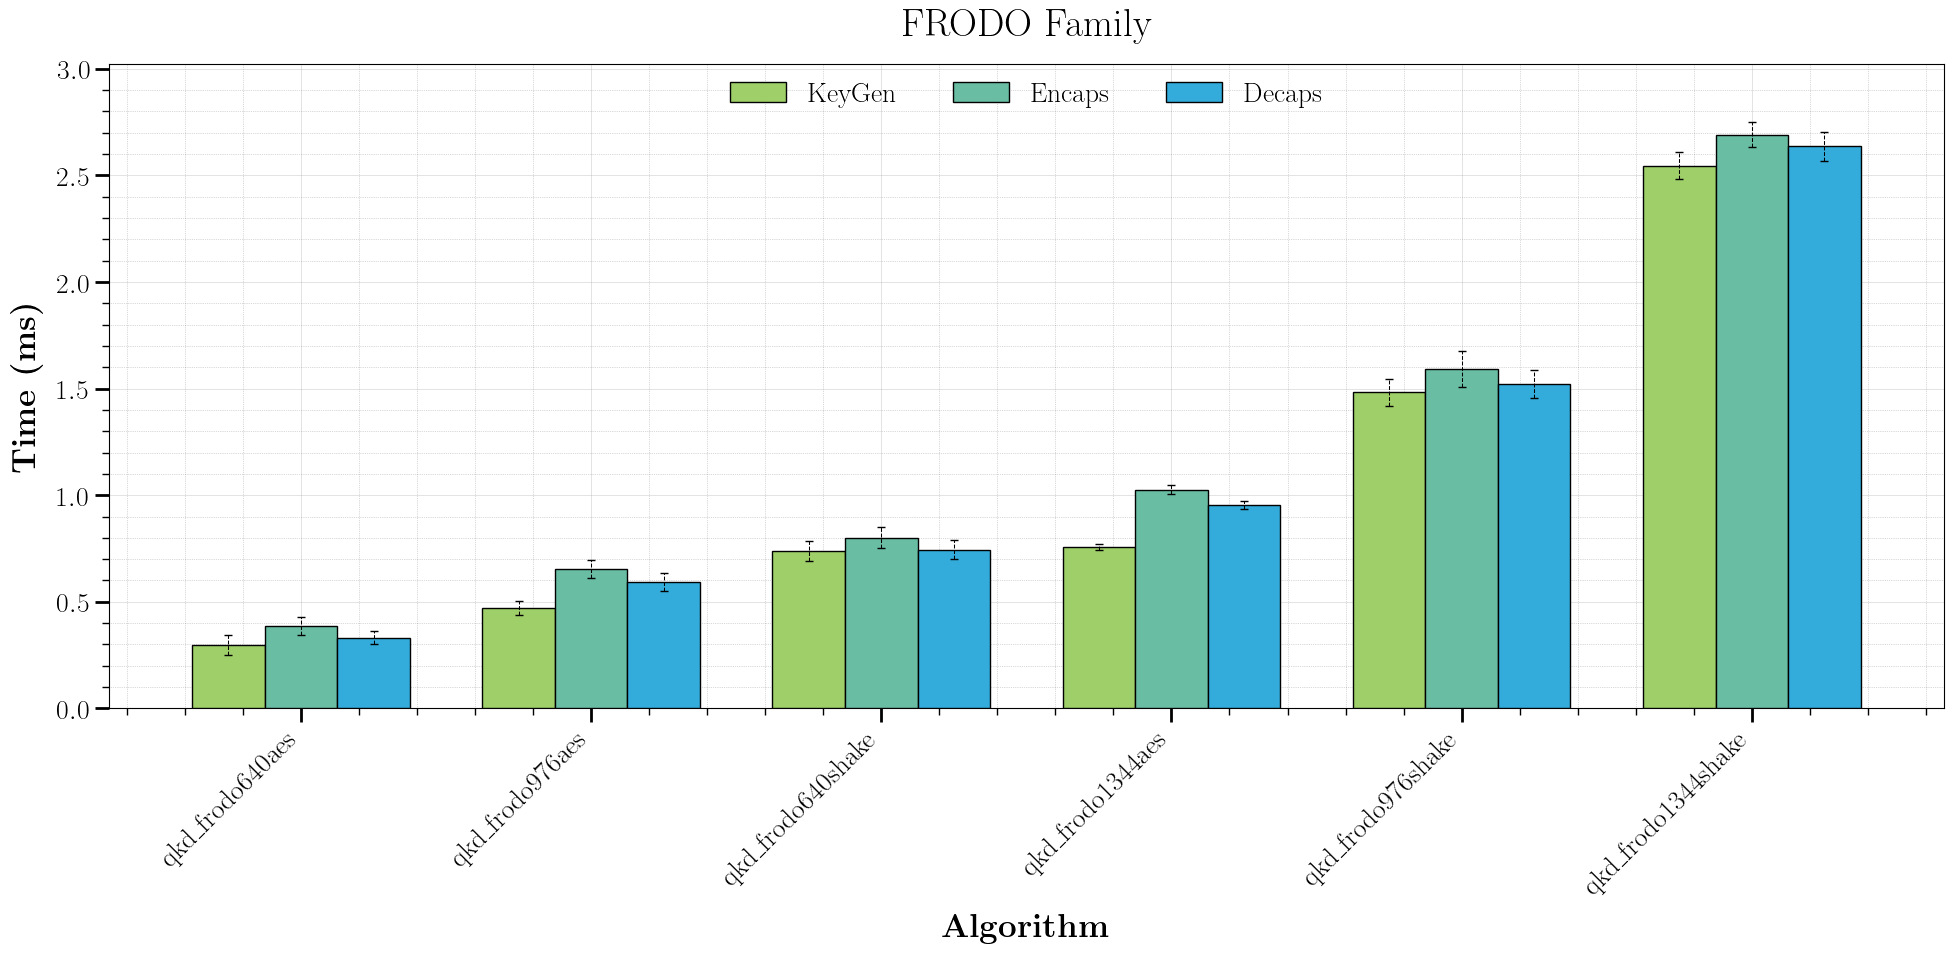

In [19]:
plot_kem_family(input_df=df_qkdkems_stats, family='frodo', error_suffix="_std", plot_title="qkdfrodo_times.pdf", log_scale=False)

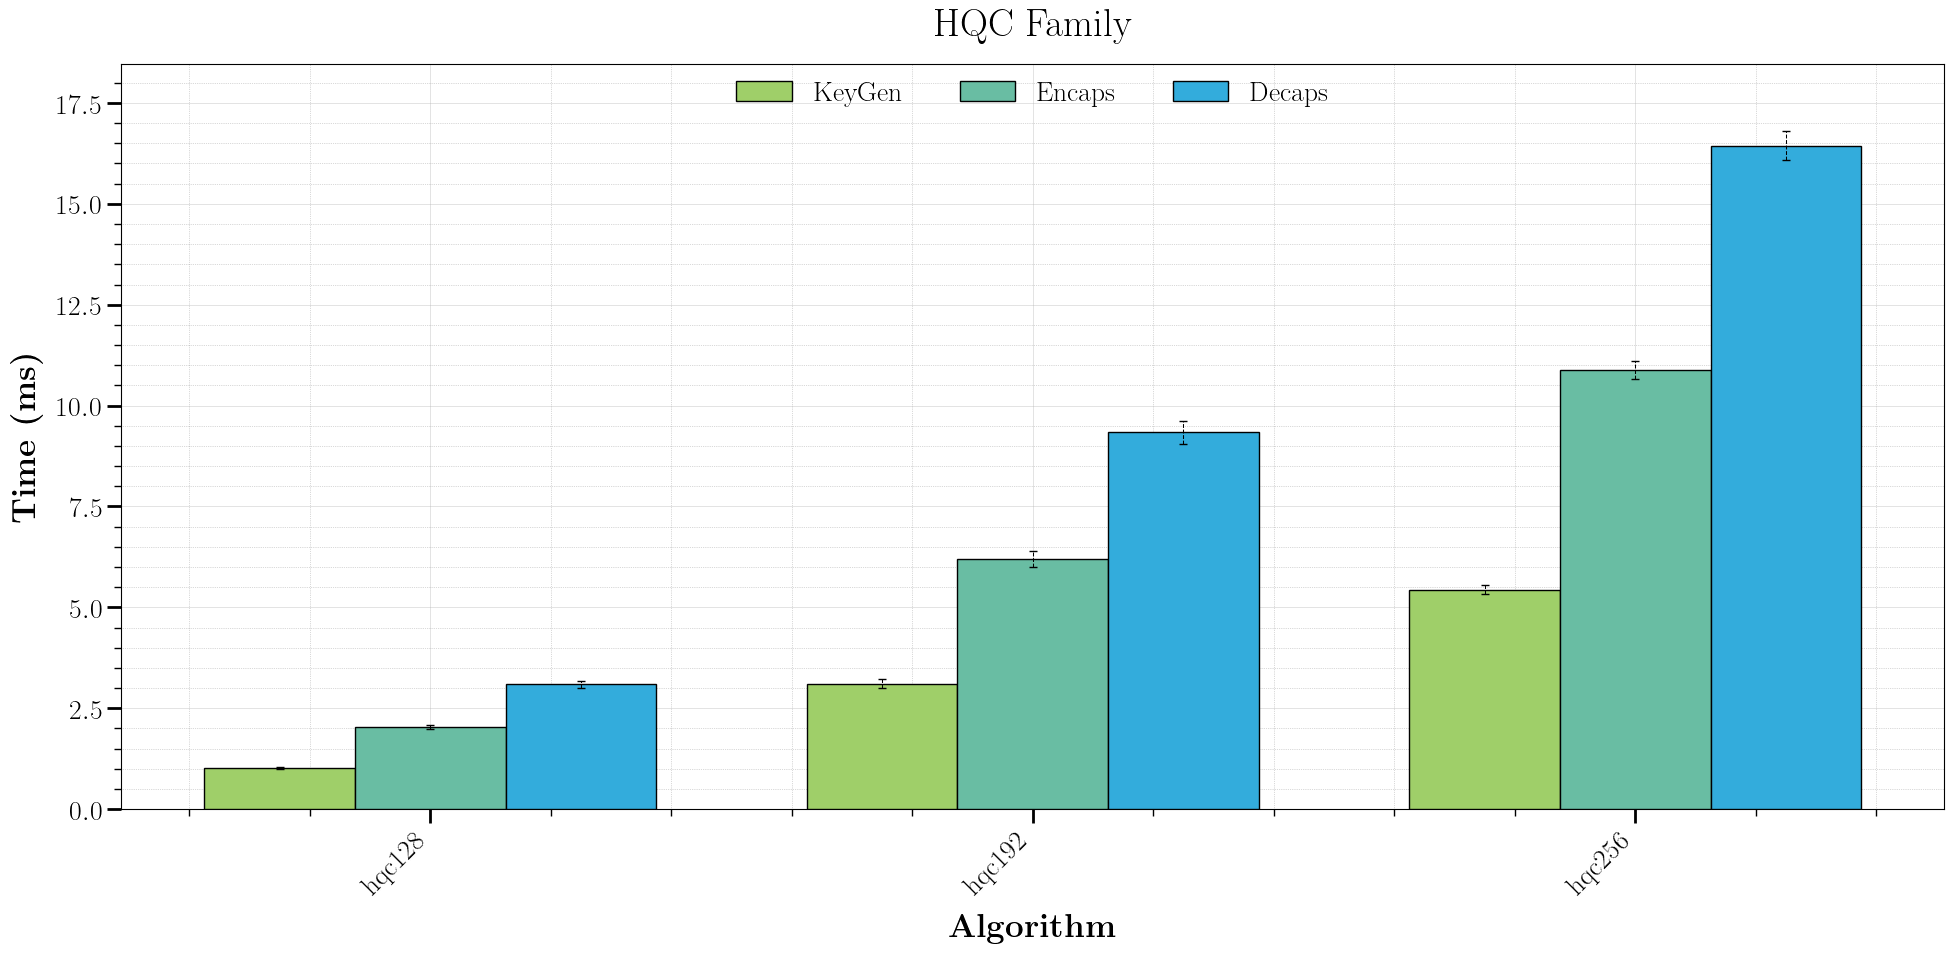

In [20]:
plot_kem_family(input_df=df_kems_stats, family='hqc', error_suffix="_std", plot_title="hqc_times.pdf", log_scale=False)

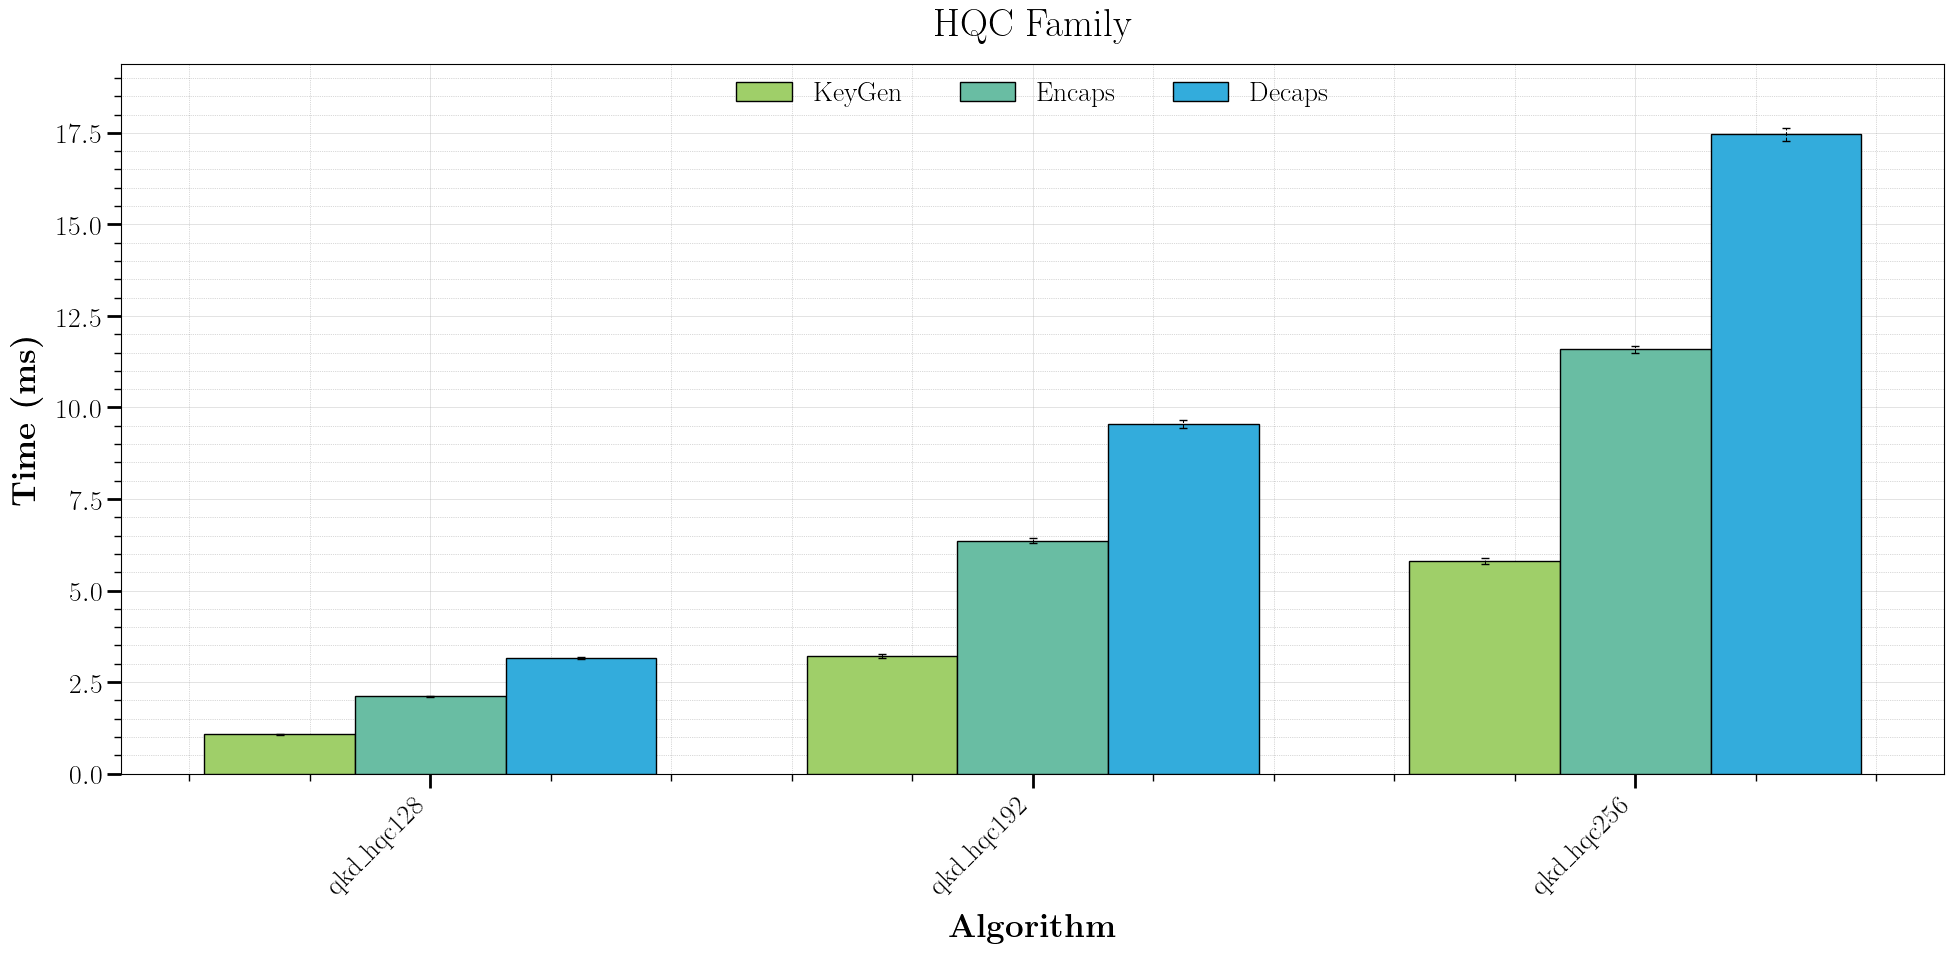

In [21]:
plot_kem_family(input_df=df_qkdkems_stats, family='hqc', error_suffix="_std", plot_title="qkdhqc_times.pdf", log_scale=False)

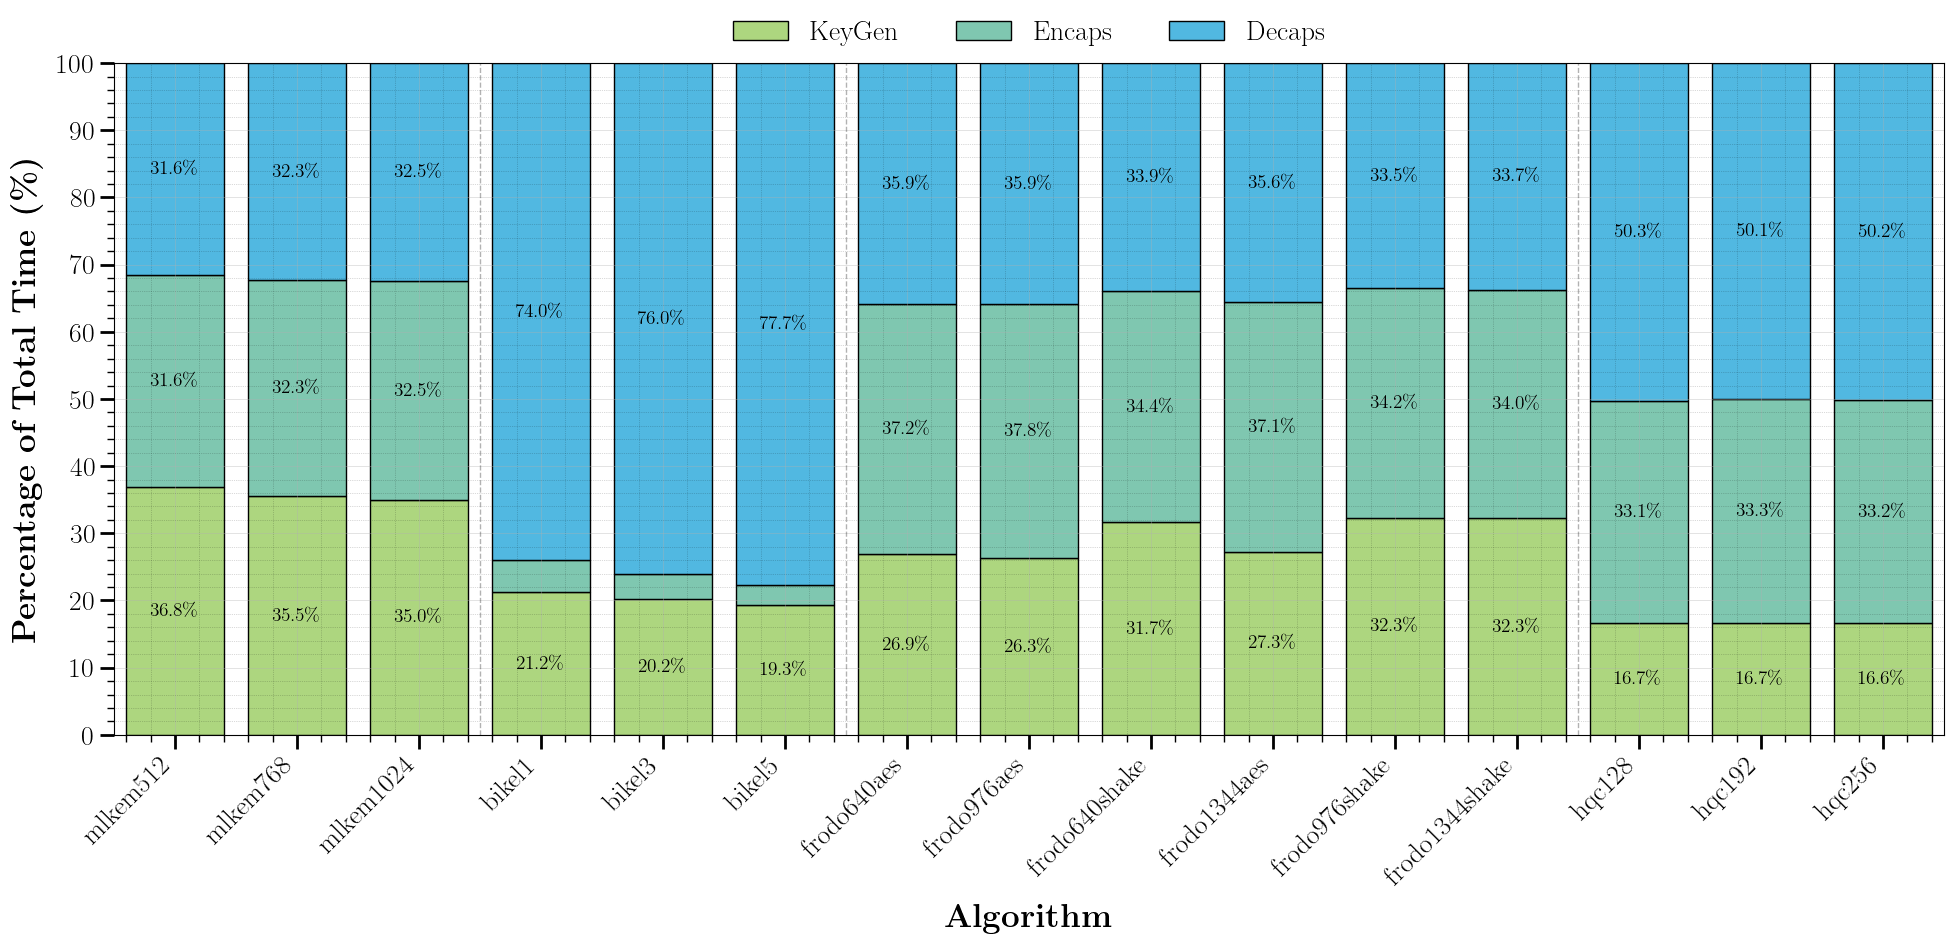

In [22]:
plot_ops_percent(input_df=df_kems_stats, family=None, plot_title="kems_ops_overhead.pdf")

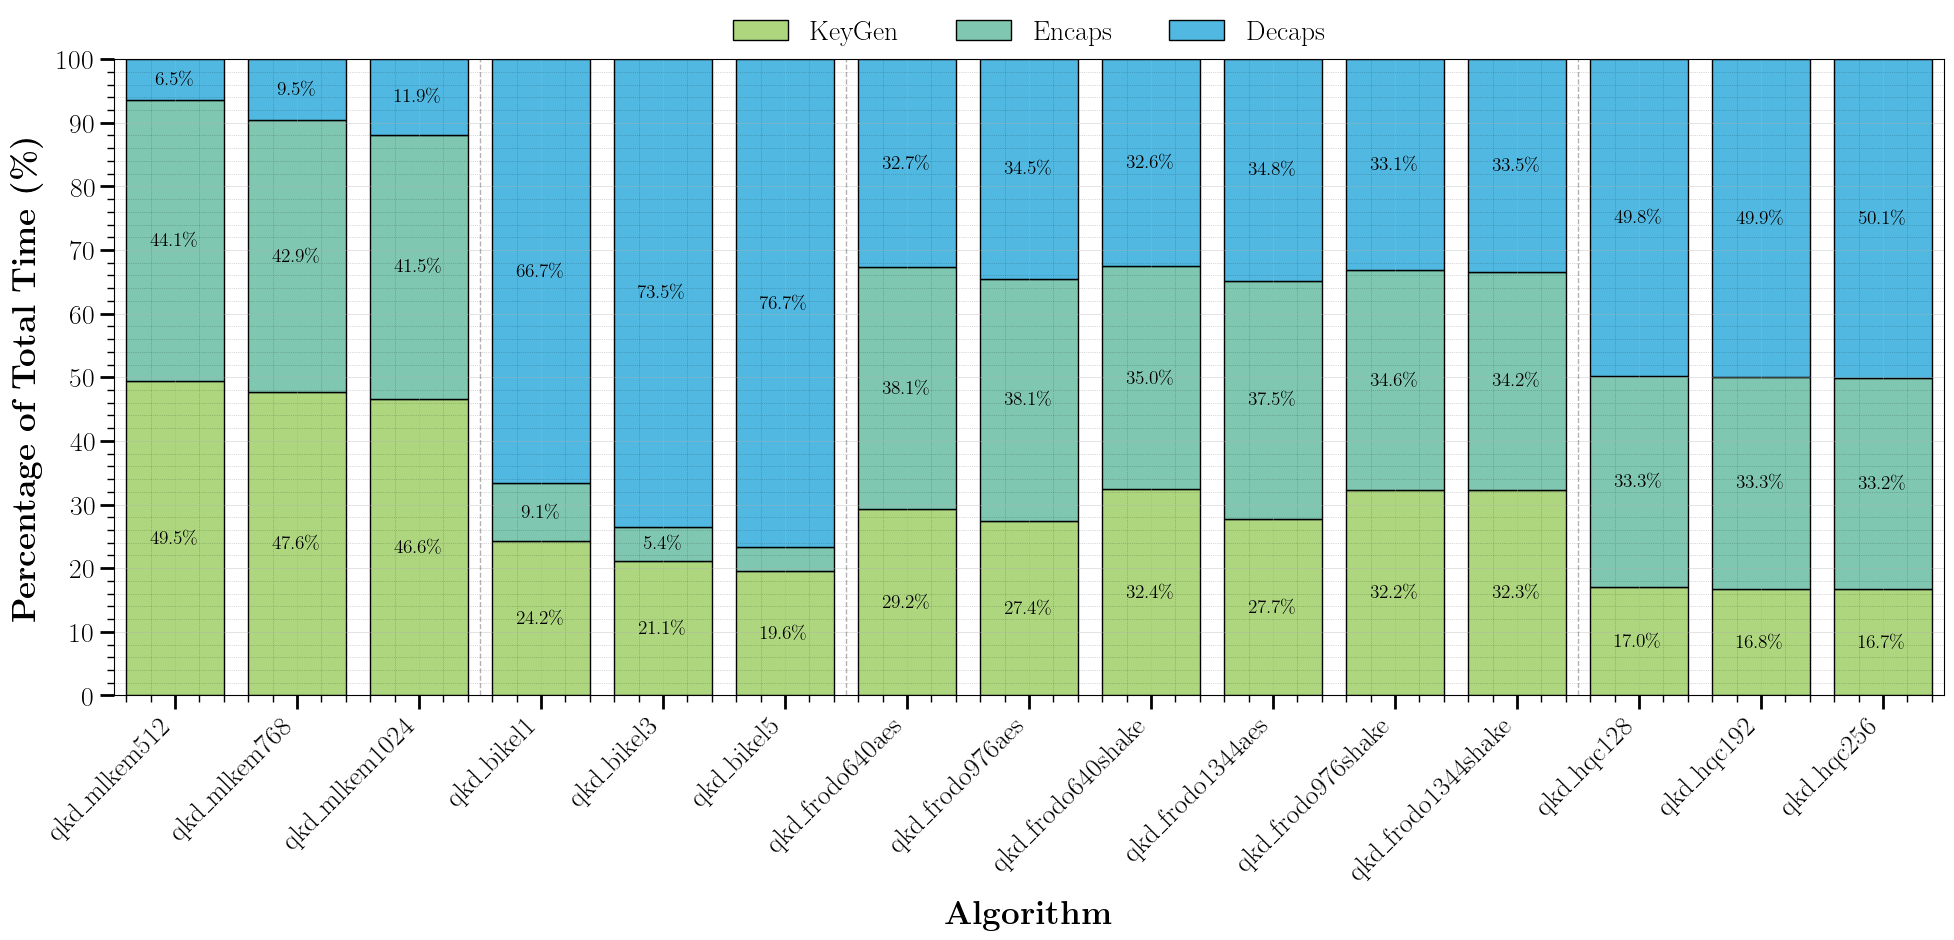

In [23]:
plot_ops_percent(input_df=df_qkdkems_stats, family=None, plot_title="qkdkems_ops_overhead.pdf")

In [24]:
# Combine the DataFrames for comparison 

from config import (KEM_FAMILIES)

algo_names = [alg for family in KEM_FAMILIES.values() for alg in family]

# Create copies to avoid modifying originals
df_std = df_kems_stats.copy()
df_qkd = df_qkdkems_stats.copy()

# Filtering 
df_std_ = df_std[df_std.index.isin(algo_names)]
df_qkd_ = df_qkd[df_qkd.index.str.replace('qkd_', '').isin(algo_names)]
    
# Rename indices to match if needed
df_qkd_.index = [idx.replace('qkd_', '') for idx in df_qkd_.index]
    
# Concatenate and sort
comparison_stats = pd.concat([df_std_, df_qkd_], 
                            keys=['OQS', 'QKD'],
                            names=['Variant', 'Algorithm'])

comparison_stats.to_csv("data/comparison_stats.csv")

comparison_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Variant Algorithm                                                        
OQS     bikel1                    198            0.137           0.010   
        bikel3                    198            0.377           0.060   
        bikel5                    198            0.881           0.058   
        frodo1344aes              198            0.738           0.029   
        frodo1344shake            198            2.457           0.078   
        frodo640aes               198            0.248           0.022   
        frodo640shake             198            0.700           0.029   
        frodo976aes               198            0.408           0.018   
        frodo976shake             198            1.397           0.046   
        hqc128                    198            1.026           0.027   
        hqc192                    198            3.107           0.106   
        hqc256                    198            5.439           0.118   
        mlkem1024                 198            0.014           0.002   
        mlkem512                  198            0.007           0.000   
        mlkem768                  198            0.011           0.001   
QKD     bikel1                     98            0.180           0.005   
        bikel3                     98            0.422           0.008   
        bikel5                     98            0.950           0.030   
        frodo1344aes               98            0.758           0.015   
        frodo1344shake             98            2.545           0.064   
        frodo640aes                98            0.297           0.045   
        frodo640shake              98            0.739           0.046   
        frodo976aes                98            0.471           0.032   
        frodo976shake              98            1.482           0.065   
        hqc128                     98            1.076           0.011   
        hqc192                     98            3.210           0.047   
        hqc256                     98            5.811           0.080   
        mlkem1024                  98            0.055           0.004   
        mlkem512                   98            0.046           0.002   
        mlkem768                   98            0.050           0.004   

                        KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Variant Algorithm                                                         
OQS     bikel1                   0.129           0.222            0.031   
        bikel3                   0.356           1.113            0.071   
        bikel5                   0.841           1.439            0.139   
        frodo1344aes             0.704           0.857            1.003   
        frodo1344shake           2.342           2.730            2.589   
        frodo640aes              0.228           0.347            0.343   
        frodo640shake            0.659           0.796            0.761   
        frodo976aes              0.396           0.502            0.587   
        frodo976shake            1.315           1.571            1.478   
        hqc128                   0.974           1.110            2.036   
        hqc192                   2.949           3.465            6.202   
        hqc256                   5.360           6.205           10.879   
        mlkem1024                0.013           0.041            0.013   
        mlkem512                 0.007           0.007            0.006   
        mlkem768                 0.011           0.027            0.010   
QKD     bikel1                   0.176           0.211            0.068   
        bikel3                   0.416           0.462            0.108   
        bikel5                   0.915           1.057            0.180   
        frodo1344aes             0.739           0.802            1.026   
        frodo1344shake           2.477           2.819            2.690   
     

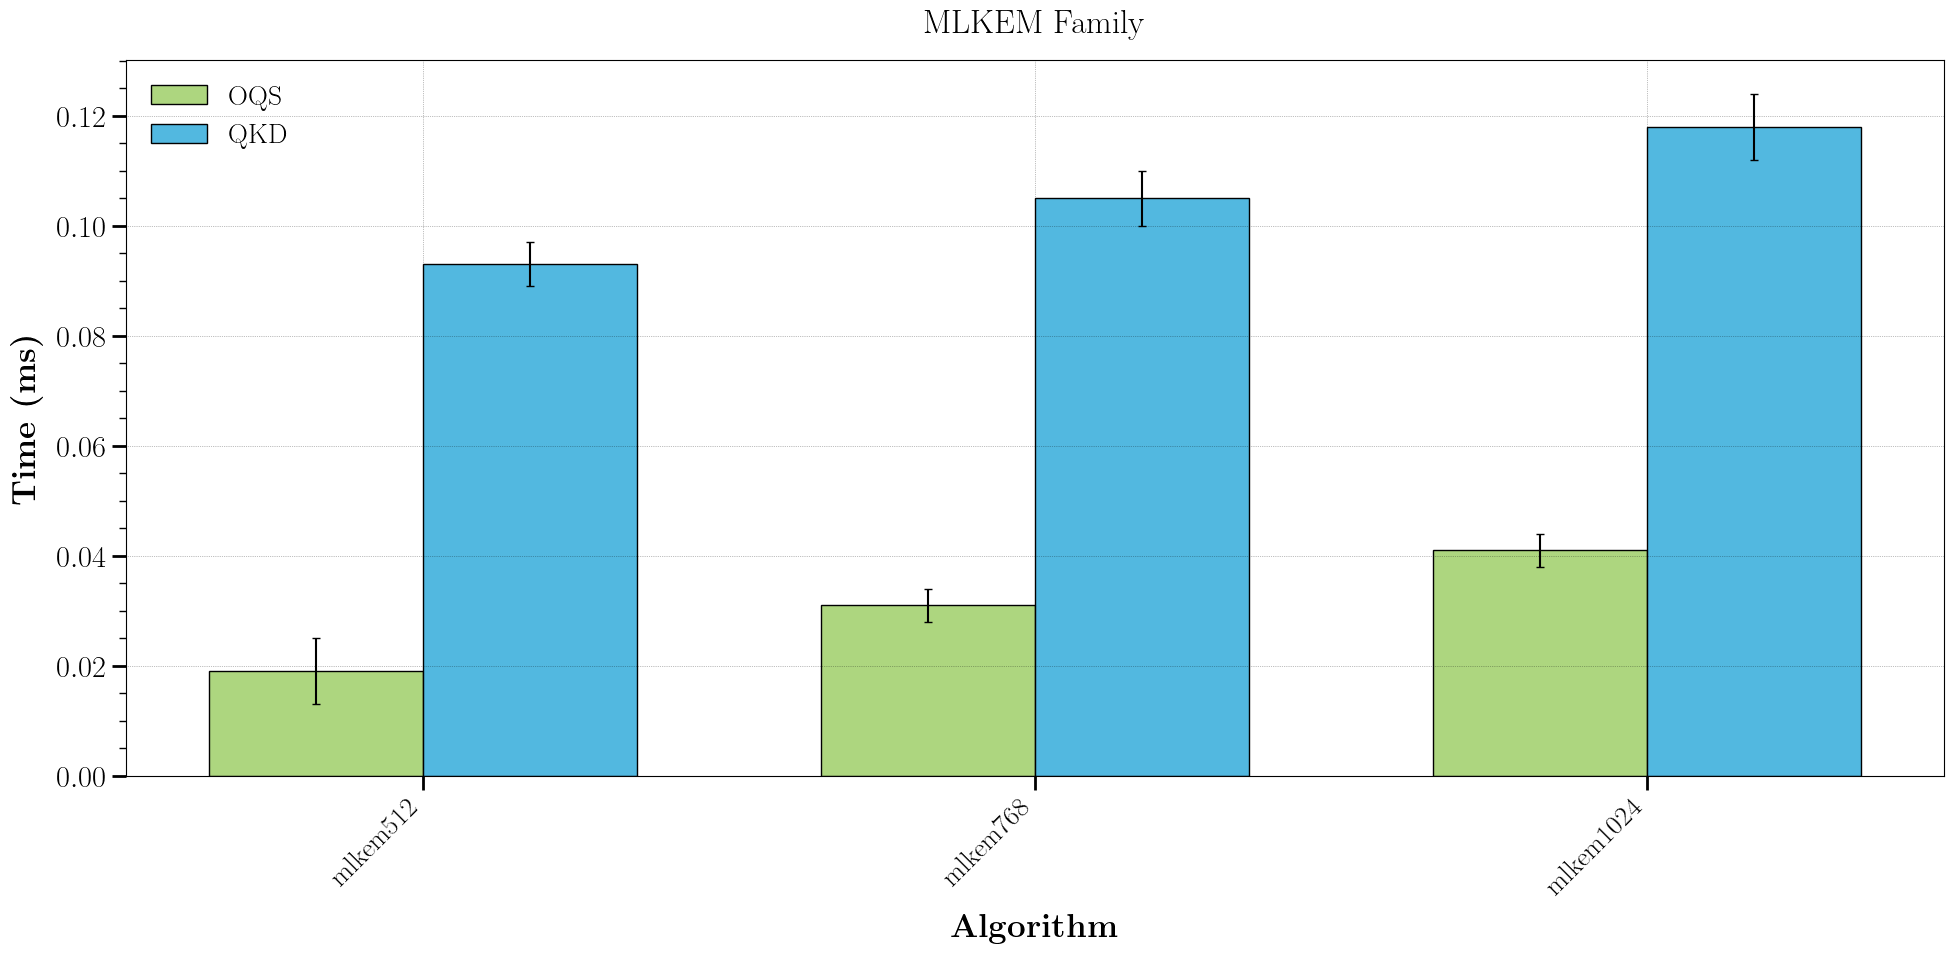

In [25]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', plot_title="mlkem_comparison.pdf")

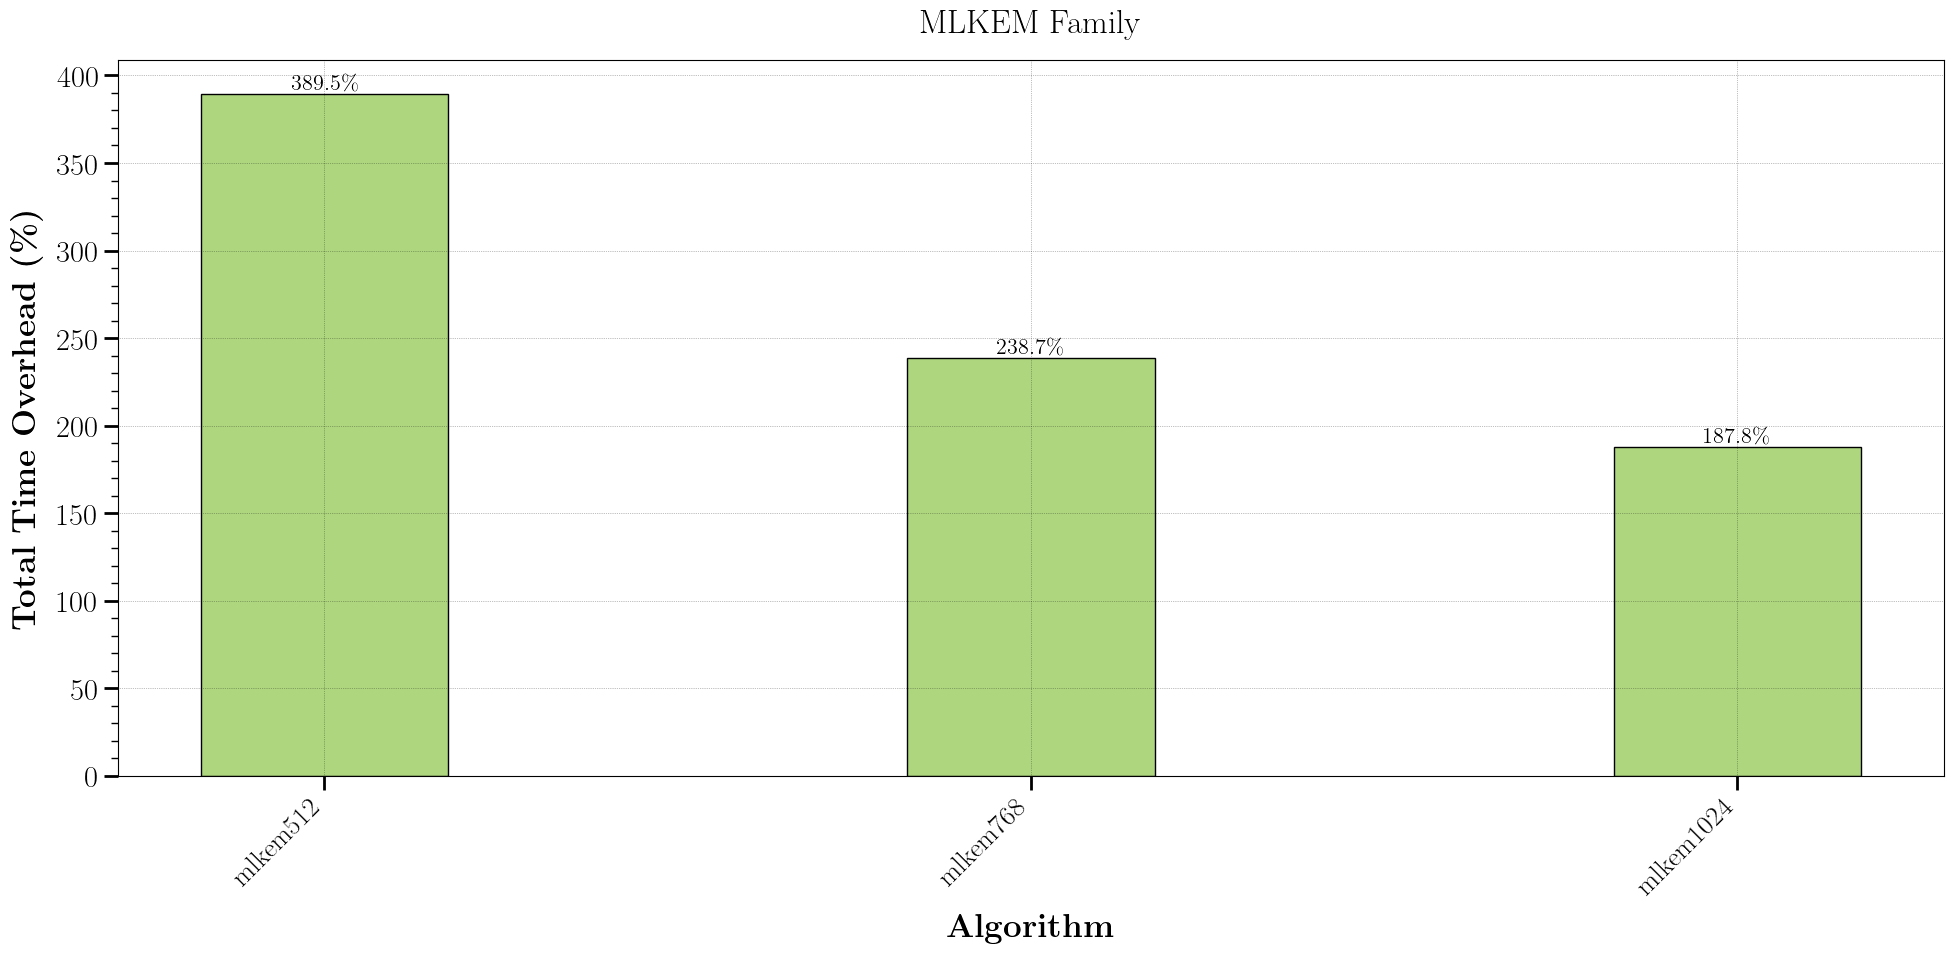

In [26]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', overhead=True, plot_title="kyber_comparison_overhead.pdf")

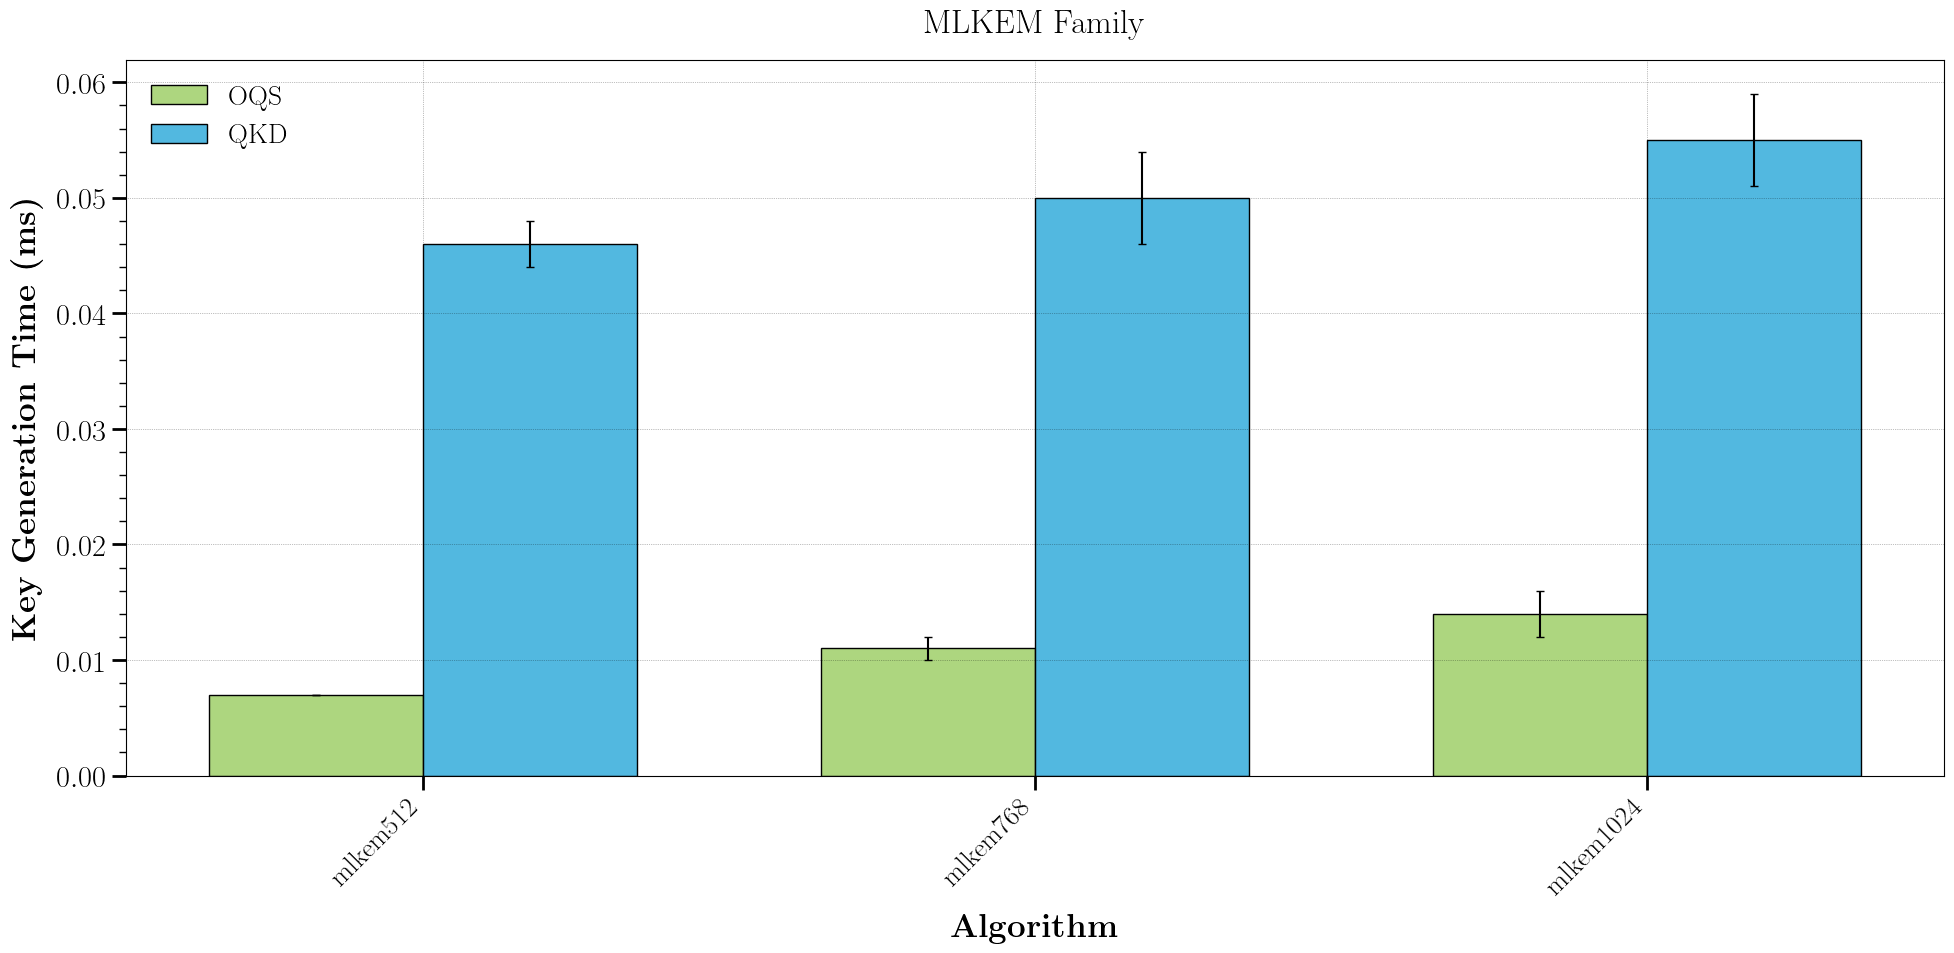

In [27]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', plot_title="mlkem_comparison_keygen.pdf")

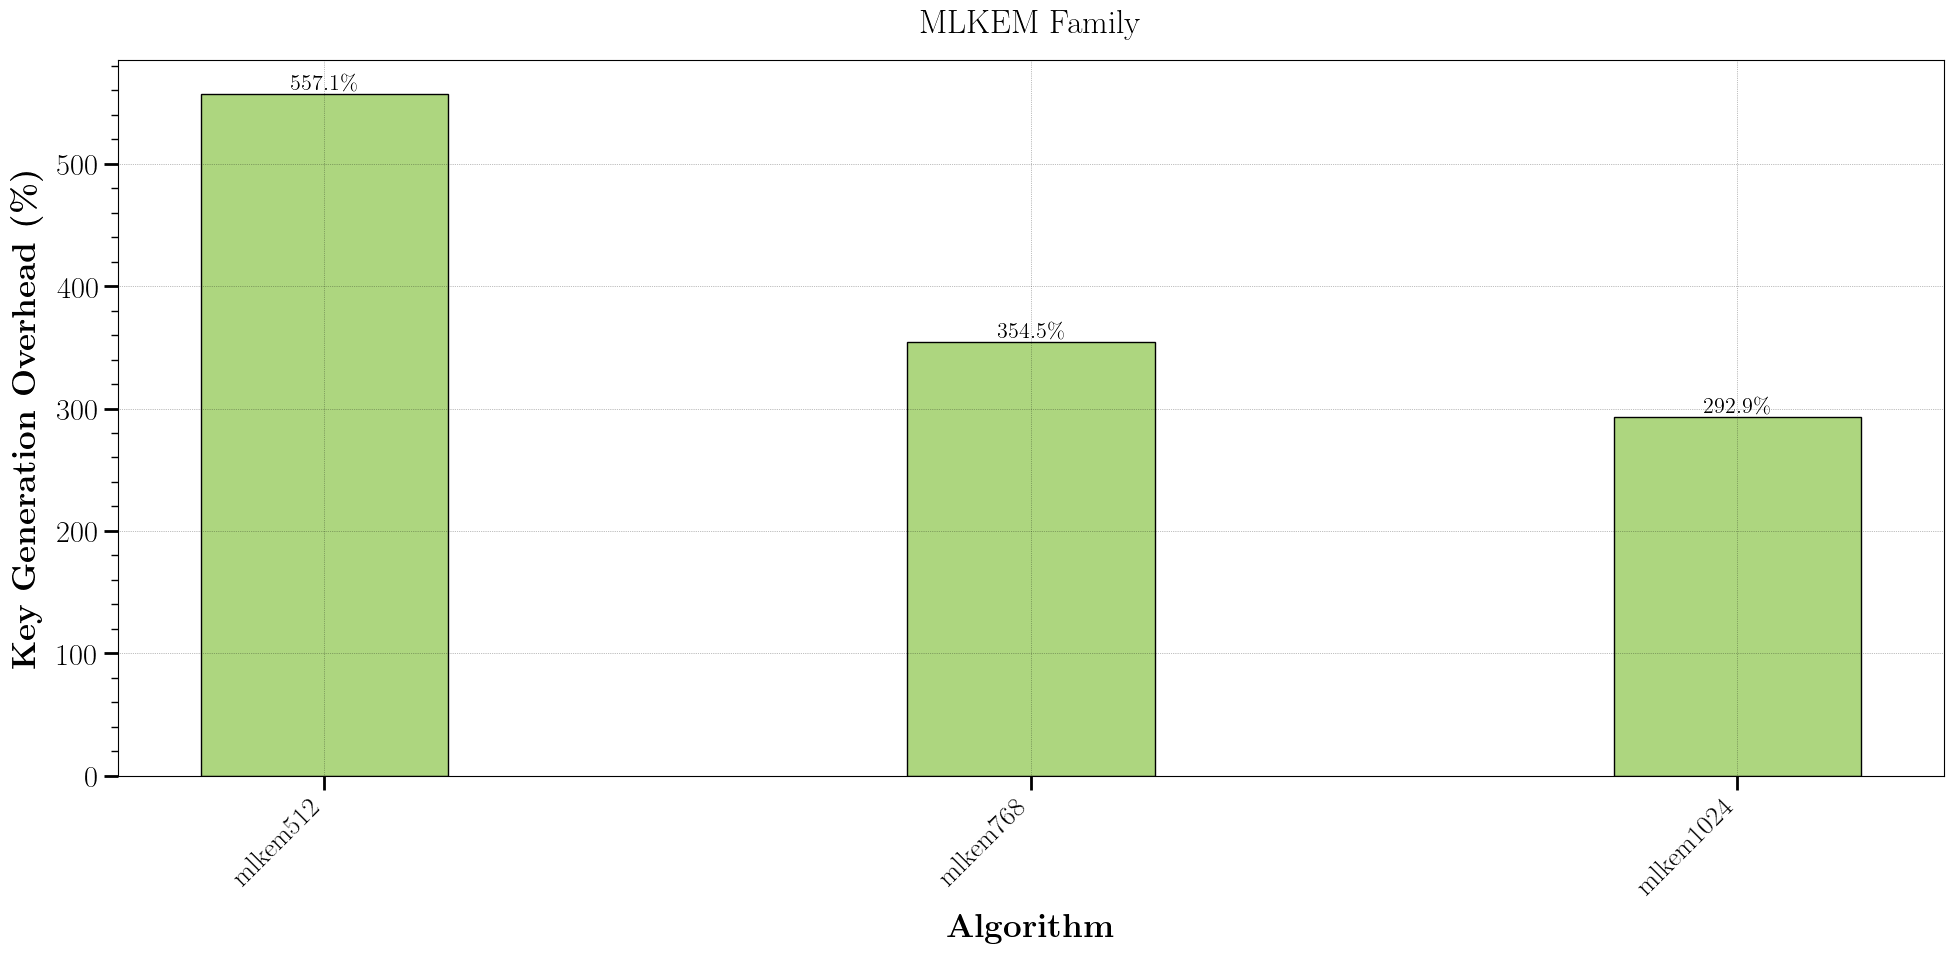

In [28]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', overhead=True, plot_title="mlkem_comparison_keygen_overhead.pdf")

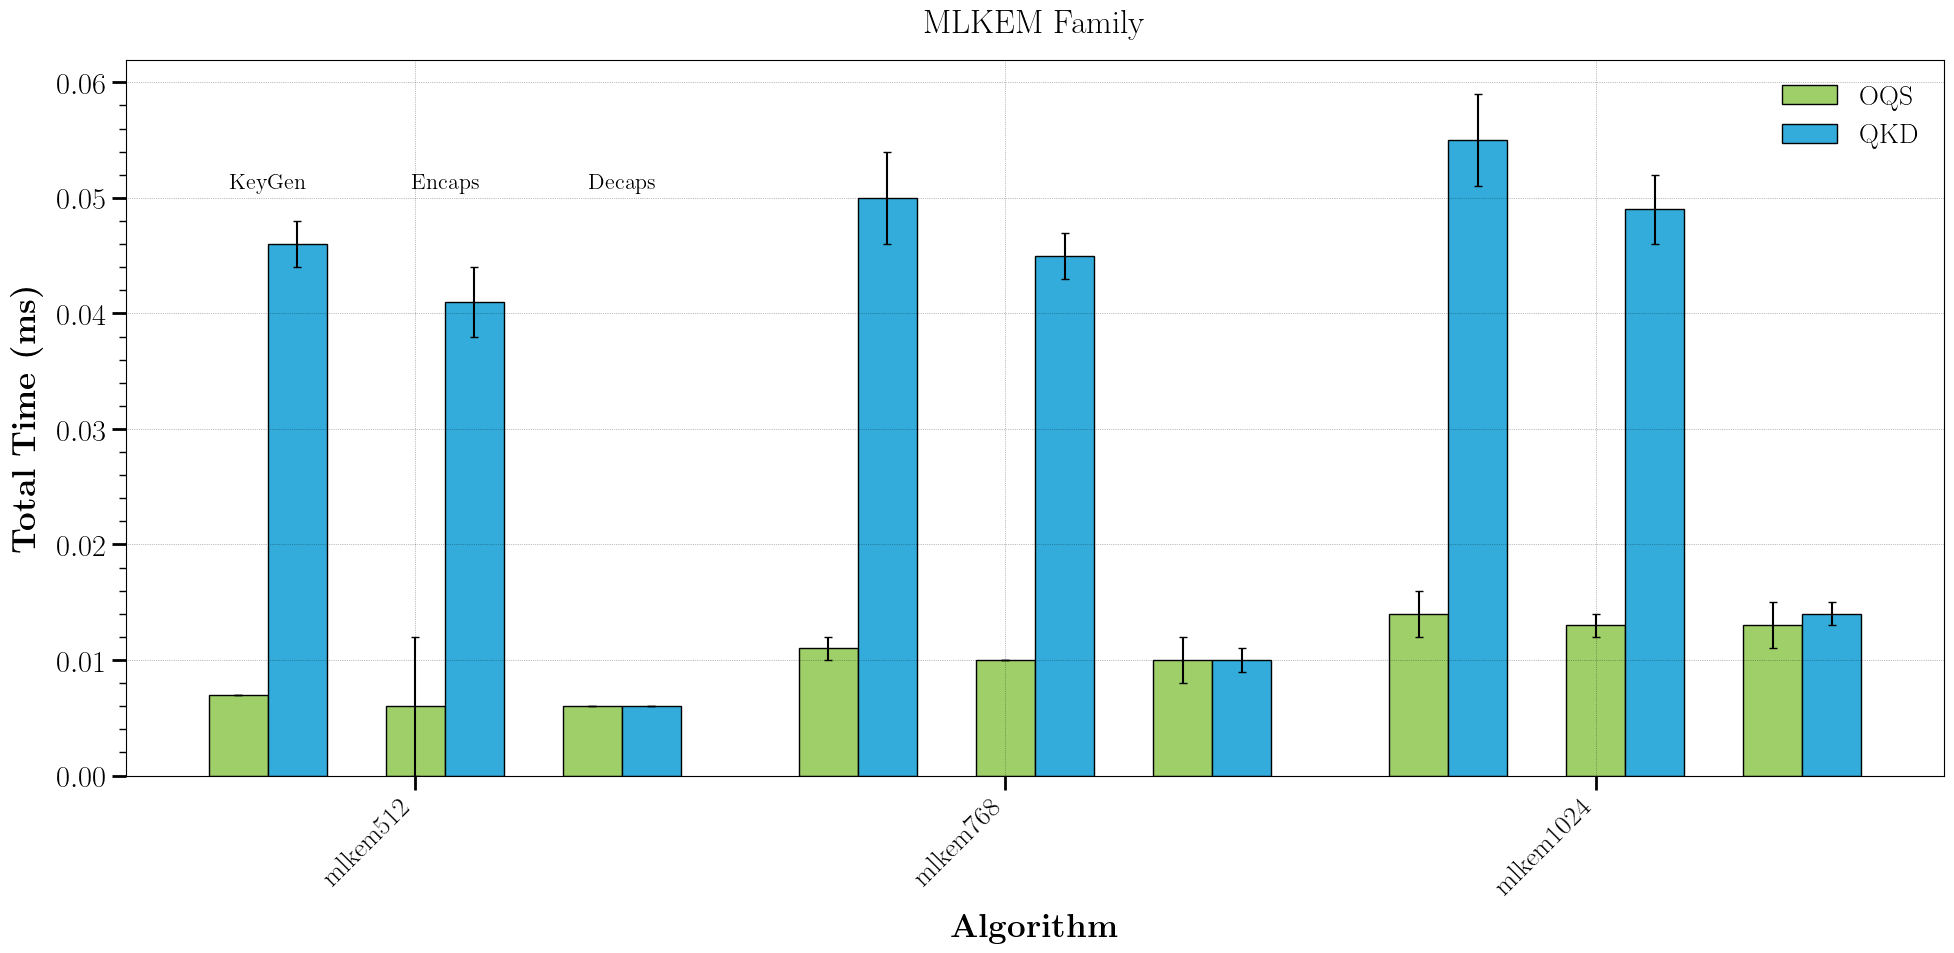

In [29]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='all', plot_title="mlkem_comparison_ops.pdf")

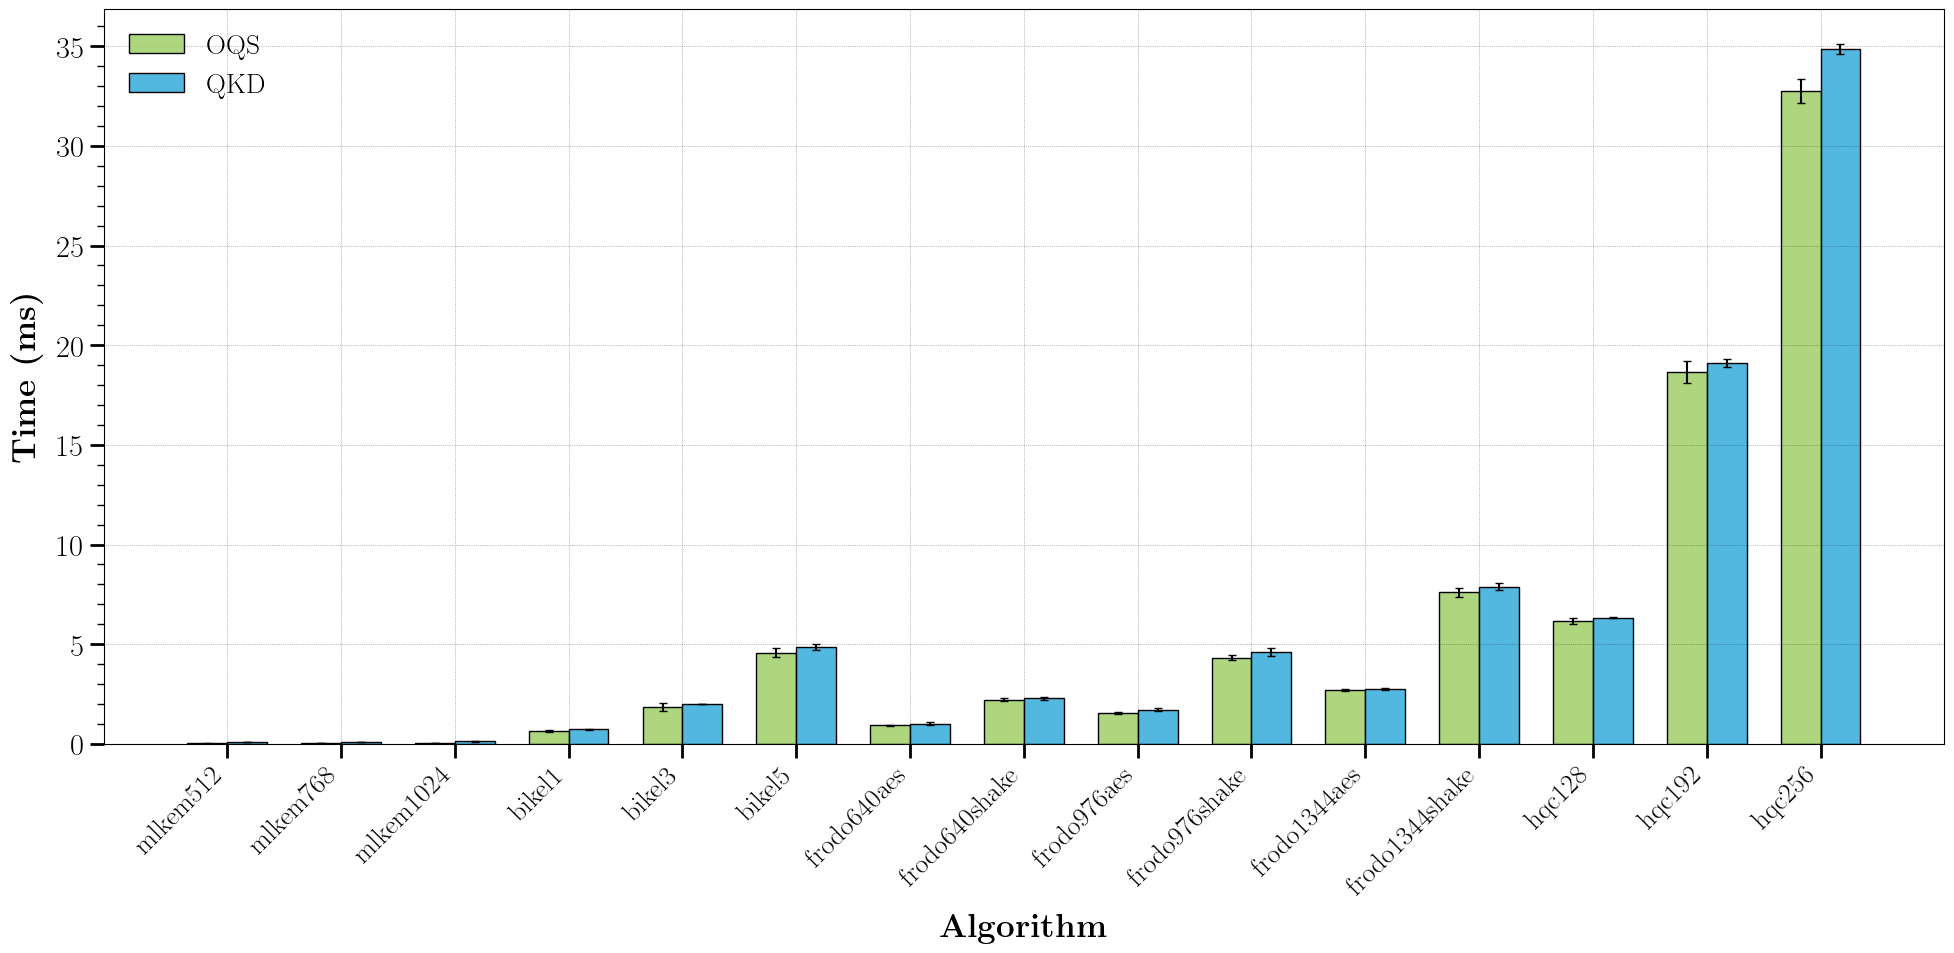

In [30]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='TotalTime(ms)',plot_title="kems_comparison.pdf")

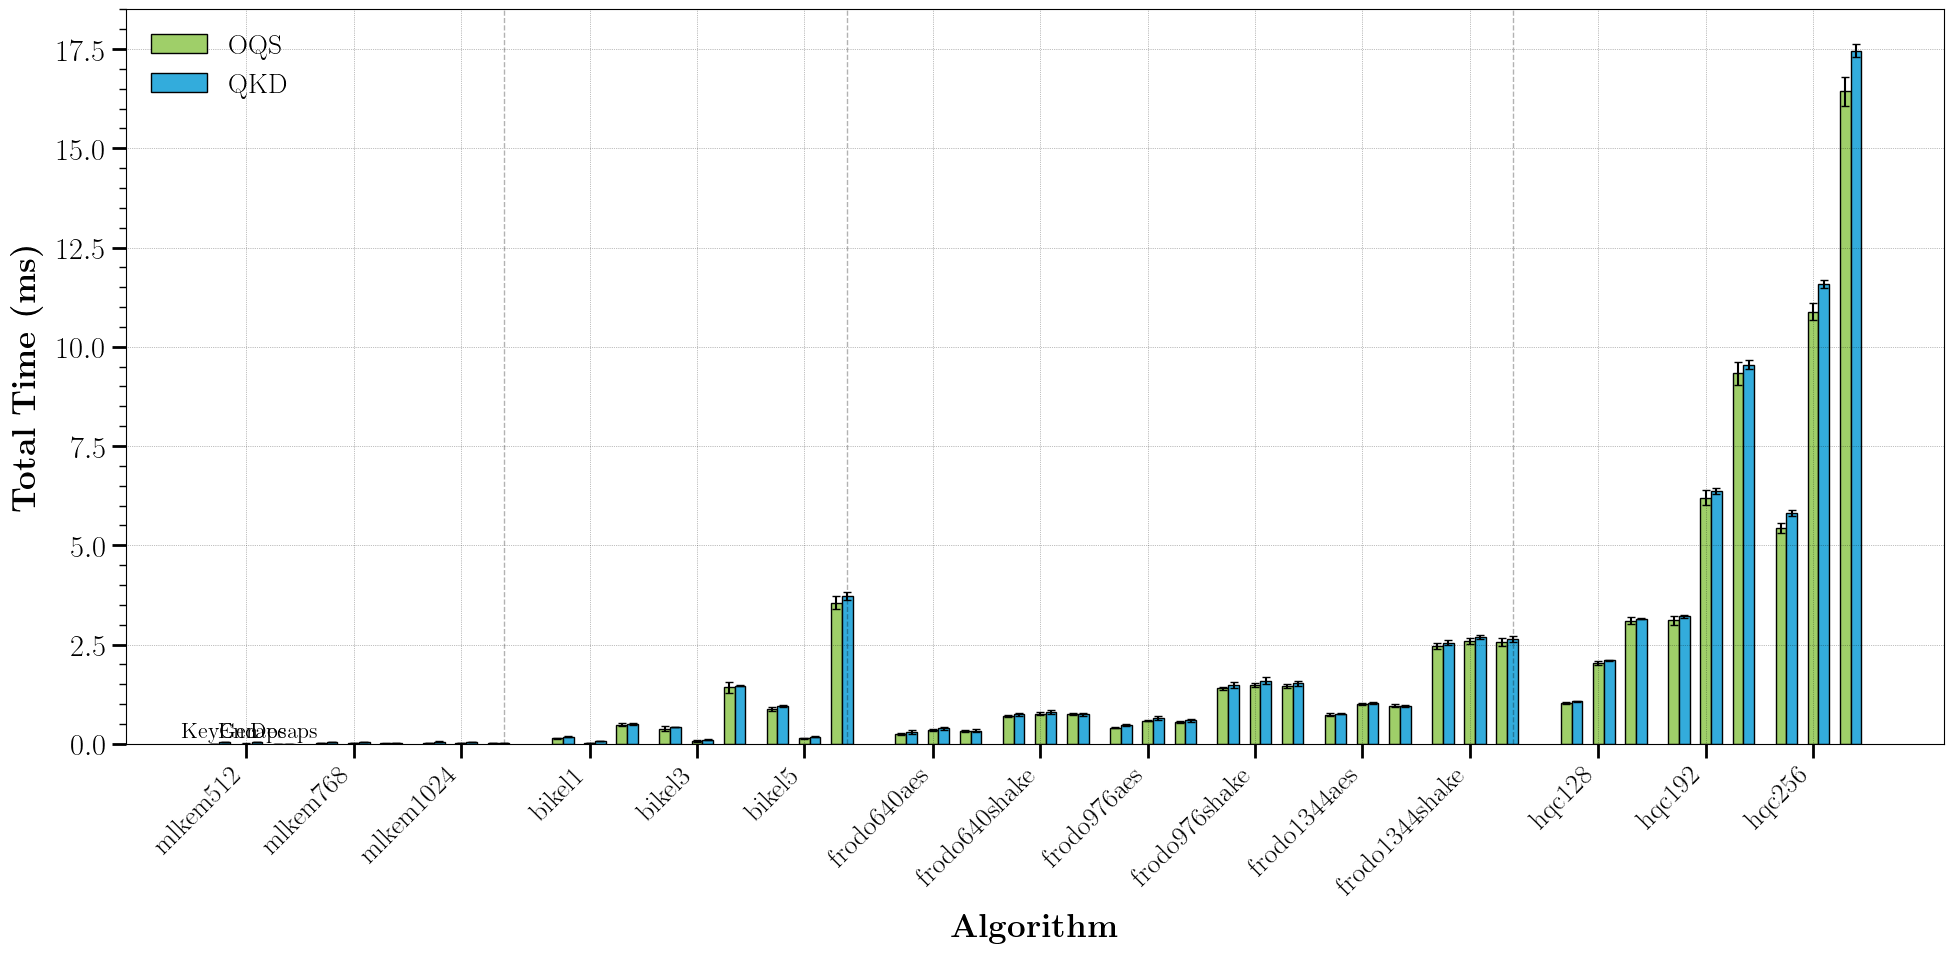

In [31]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='all',plot_title="kems_comparison_all.pdf")

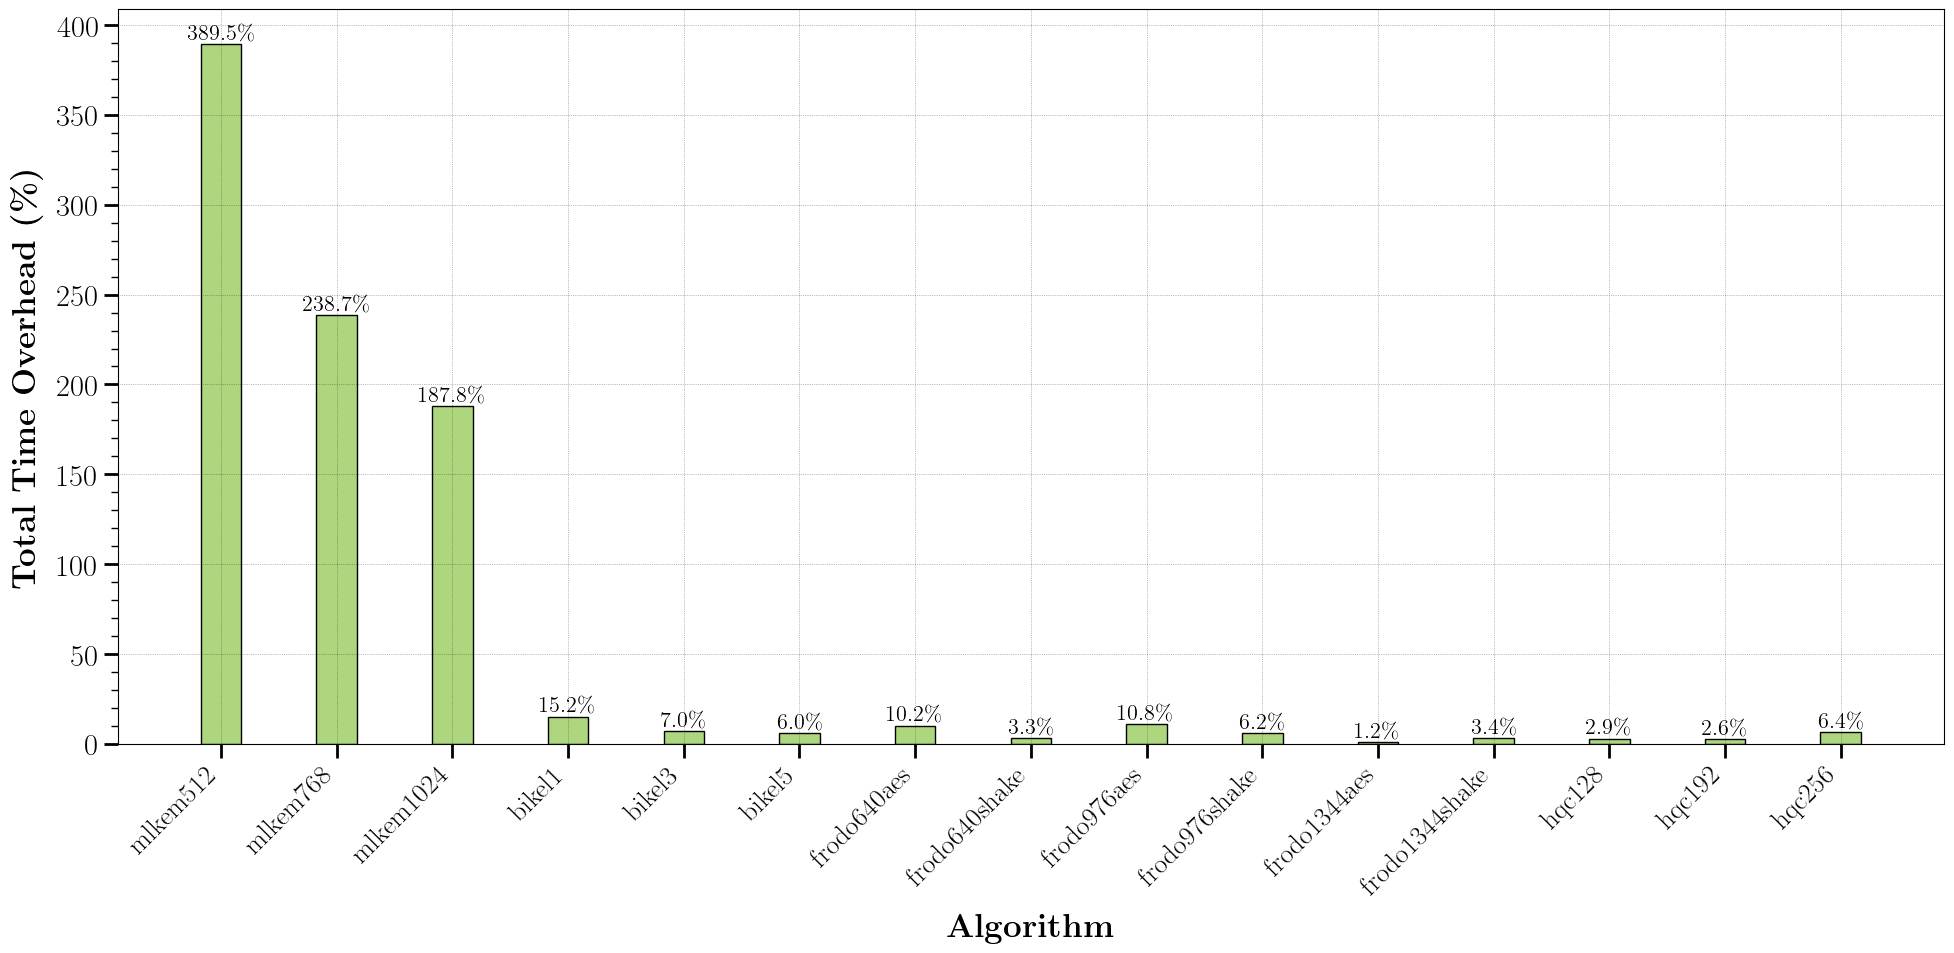

In [32]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='TotalTime(ms)',plot_title="kems_comparison_overhead.pdf")

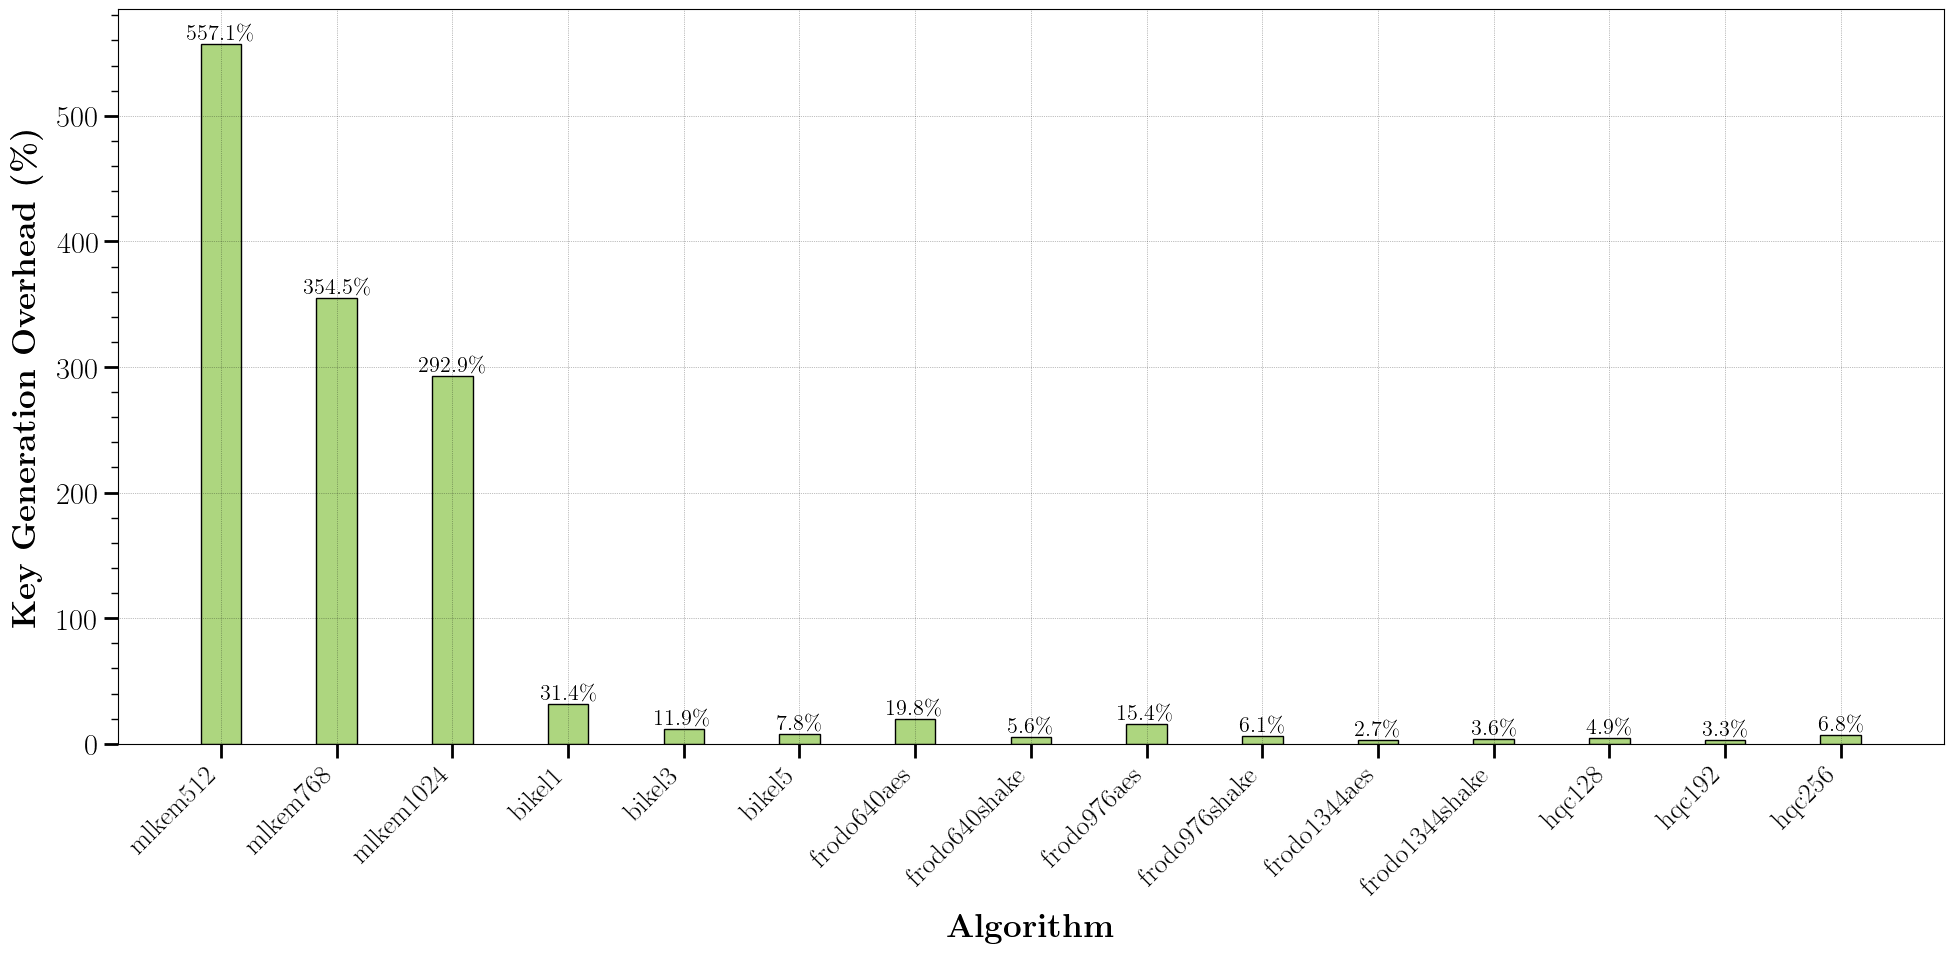

In [33]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='KeyGen(ms)', plot_title="kems_comparison_kg_overhead.pdf")

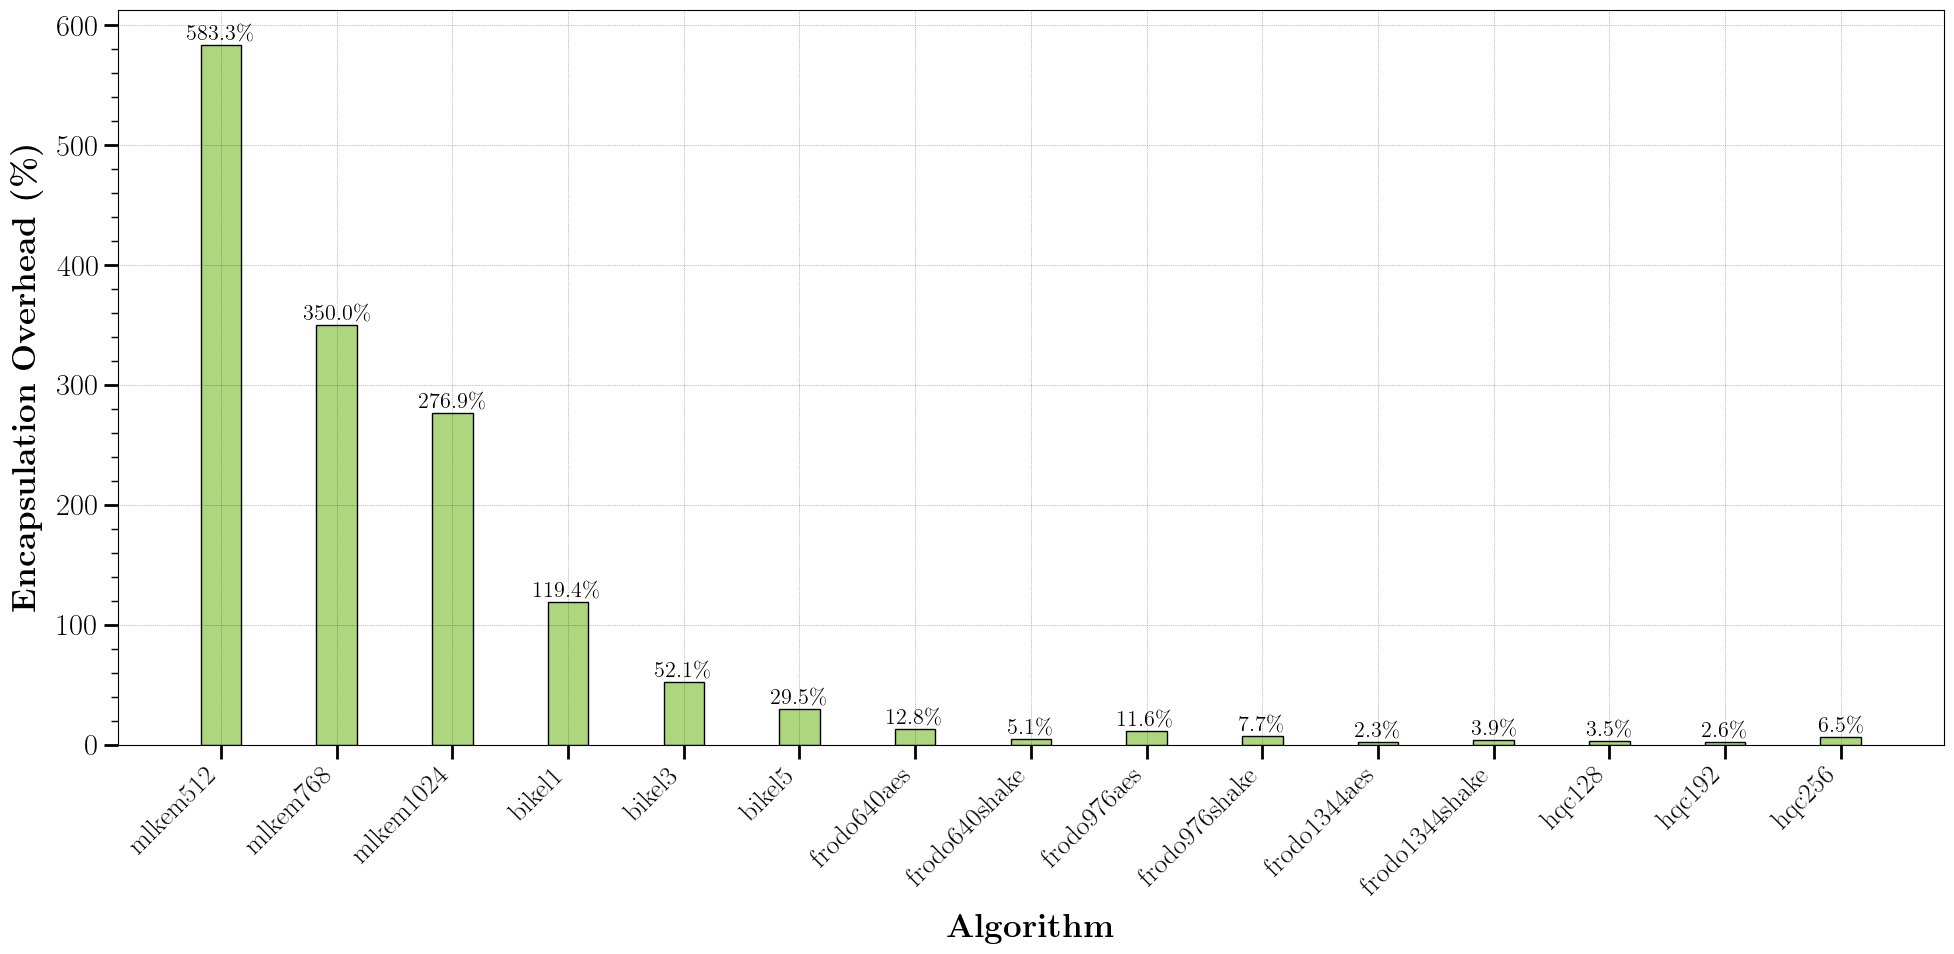

In [34]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Encaps(ms)', plot_title="kems_comparison_encap_overhead.pdf")

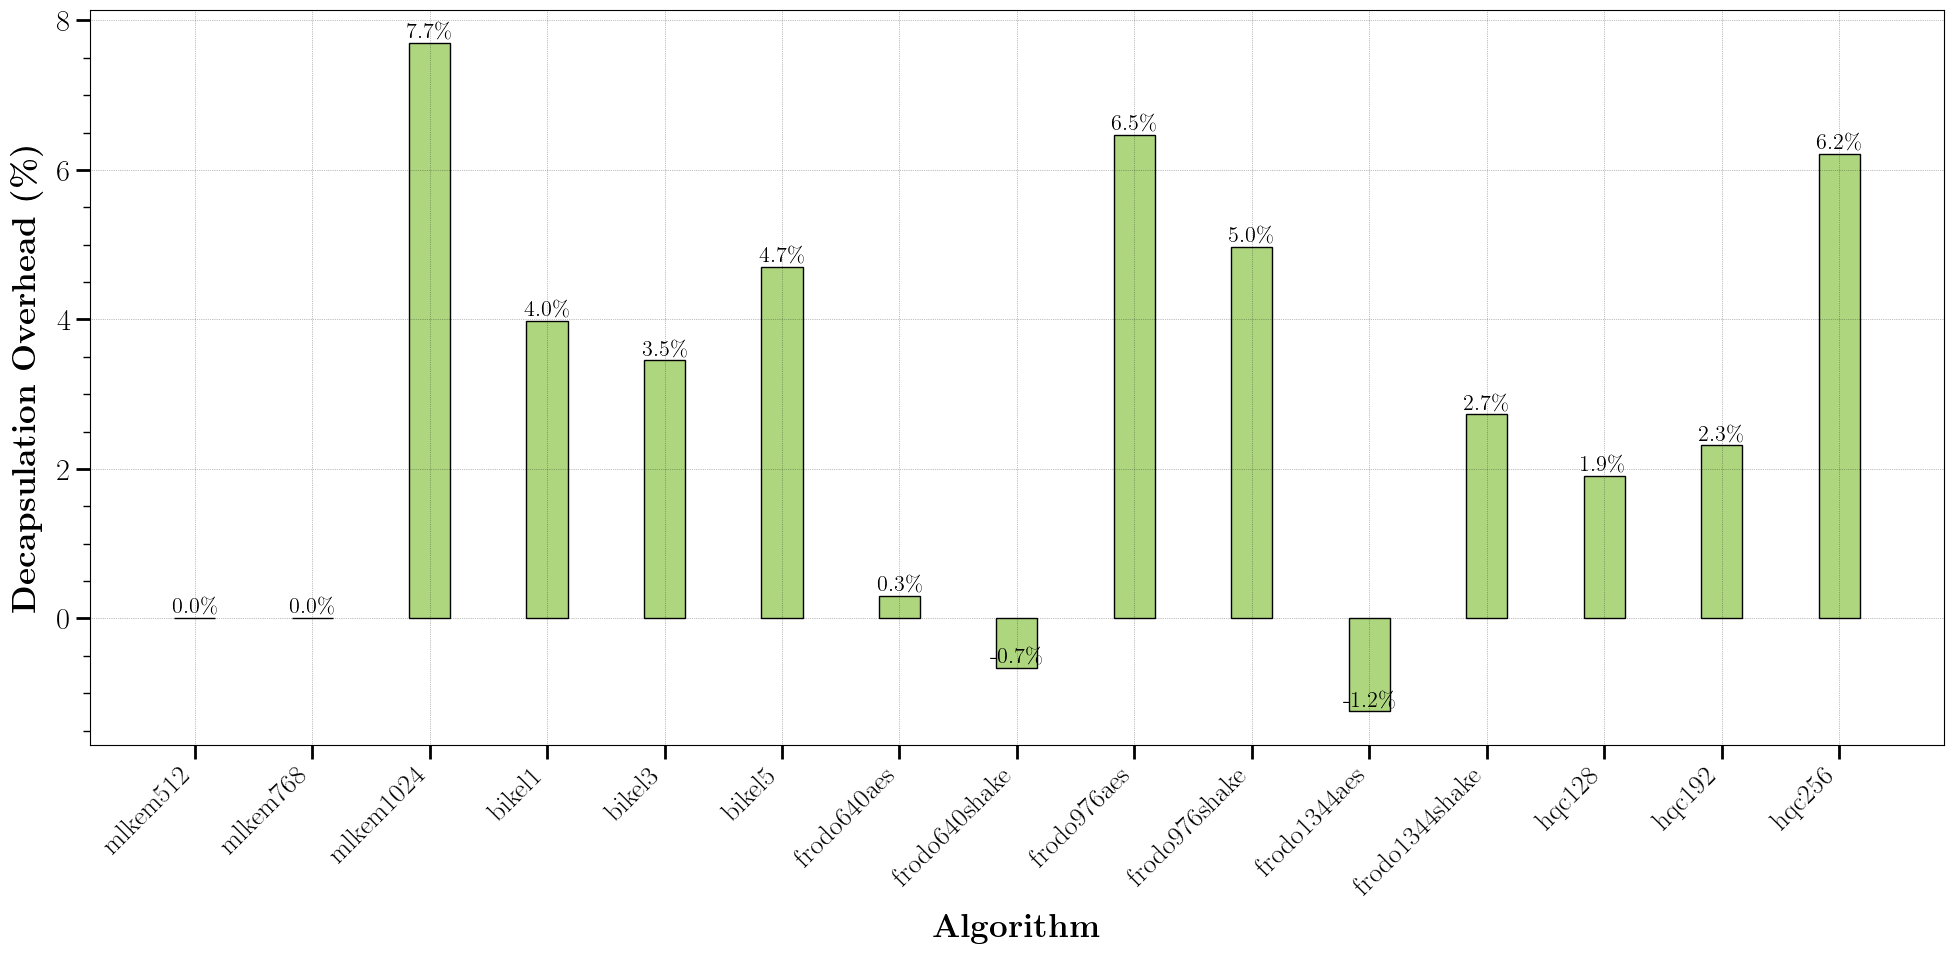

In [35]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Decaps(ms)', plot_title="kems_comparison_decap_overhead.pdf")

# BENCHMARKS - TLS

In [ ]:
df_tls_kems = tls_data_summary("data/tls_bench_oqs_200_iter_20250128.csv")

df_tls_kems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM       Cert                                                           
mlkem1024 falcon1024         200     12.455     4.189      7.15     25.34
          falcon512          200     12.348     4.003      7.46     24.31
          mldsa44            200     11.478     3.495      6.82     23.39
          mldsa65            200     11.664     3.726      6.82     24.76
          mldsa87            200     12.120     3.811      7.27     24.47
...                          ...        ...       ...       ...       ...
hqc256    mldsa65            200     55.155     5.807     46.70     70.33
          mldsa87            200     54.674     5.782     46.46     70.45
          rsa_2048           200     57.953     6.674     46.95     84.61
          rsa_3072           200     57.916     6.779     47.72     77.51
          rsa_4096           200     55.677     6.814     45.92     81.17

[120 rows x 5 columns]

In [ ]:
df_tls_qkdkems = tls_data_summary("data/tls_bench_qkd_200_iter_20250128.csv")

df_tls_qkdkems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM           Cert                                                           
qkd_mlkem1024 falcon1024         200     12.321     3.782      7.27     23.82
              falcon512          200     12.643     3.963      7.31     26.89
              mldsa44            200     11.878     3.671      6.95     23.09
              mldsa65            200     12.323     3.896      6.95     23.52
              mldsa87            200     12.198     3.812      7.38     23.09
...                              ...        ...       ...       ...       ...
qkd_hqc256    mldsa65            200     52.715     4.832     46.63     83.70
              mldsa87            200     55.968     6.662     45.89     74.28
              rsa_2048           200     56.659     6.771     46.83     83.98
              rsa_3072           200     56.684     7.000     47.30     82.55
              rsa_4096           200     56.291     6.974     47.34     96.50

[120 rows x 5 columns]

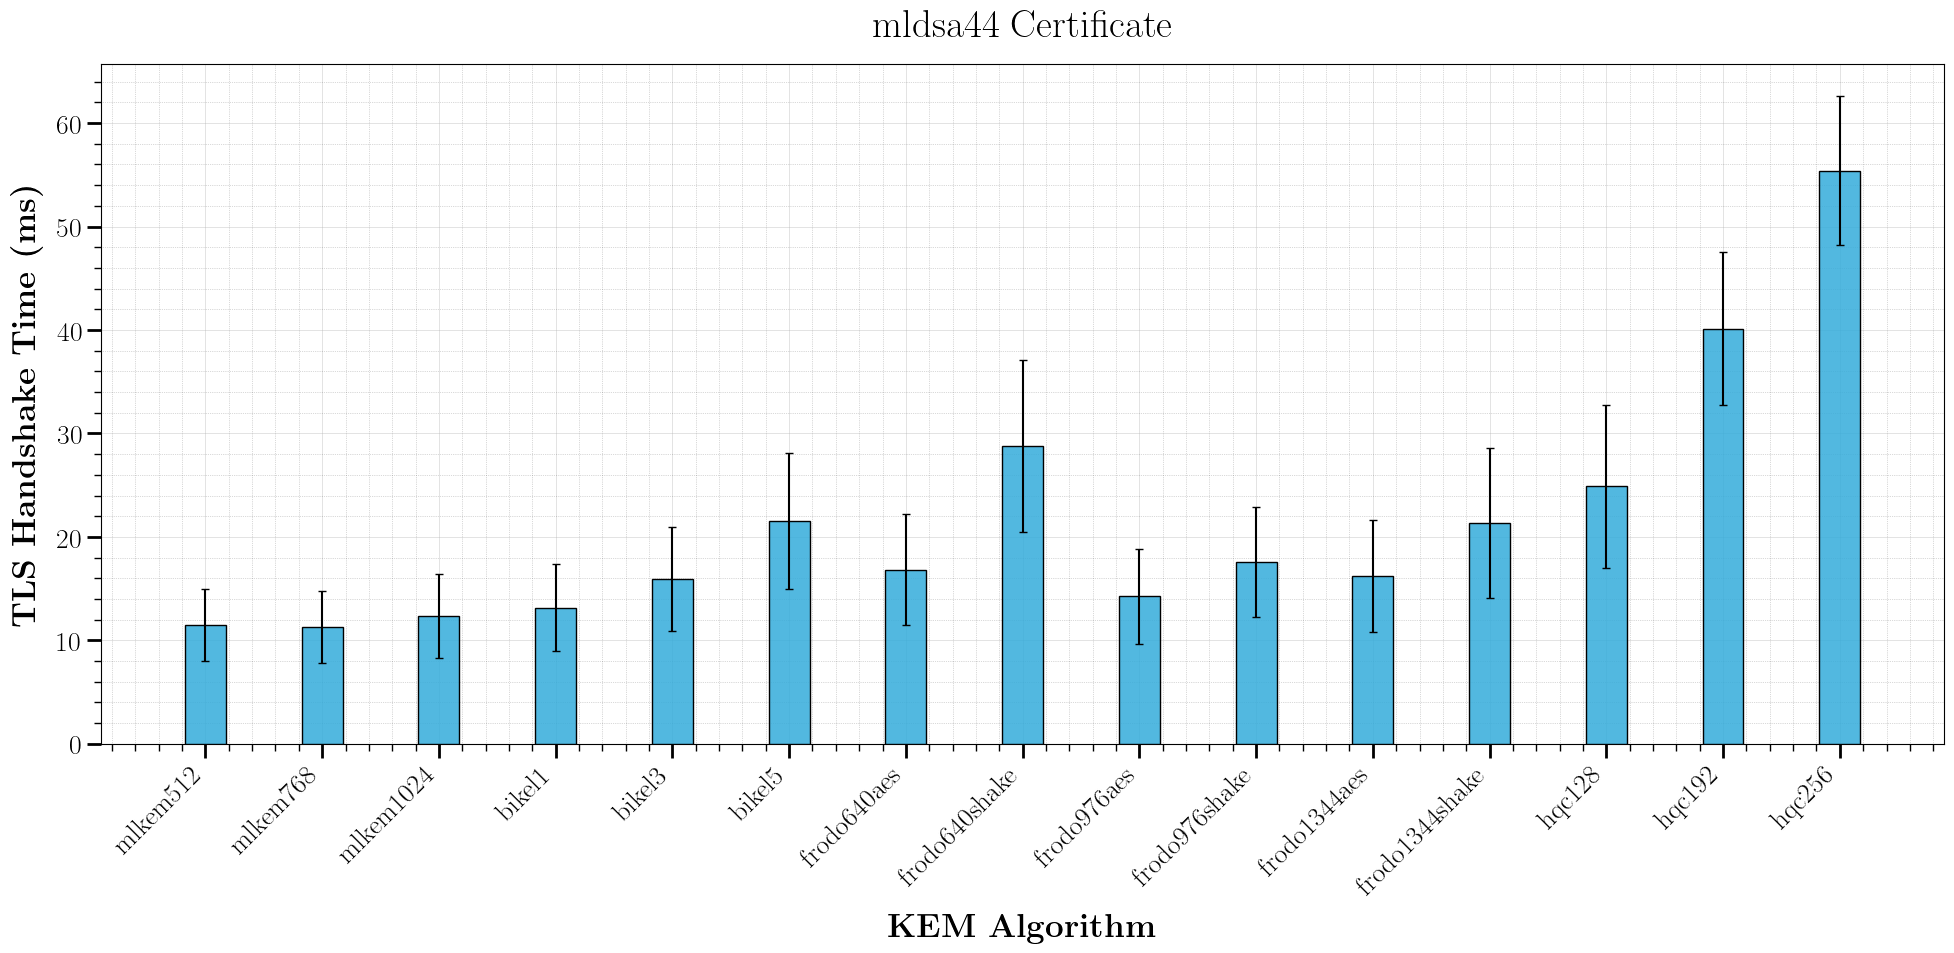

In [38]:
plot_tls_kem_families(input_df=df_tls_kems, cert_type='mldsa44', plot_title="tls_kems_mldsa44.pdf")

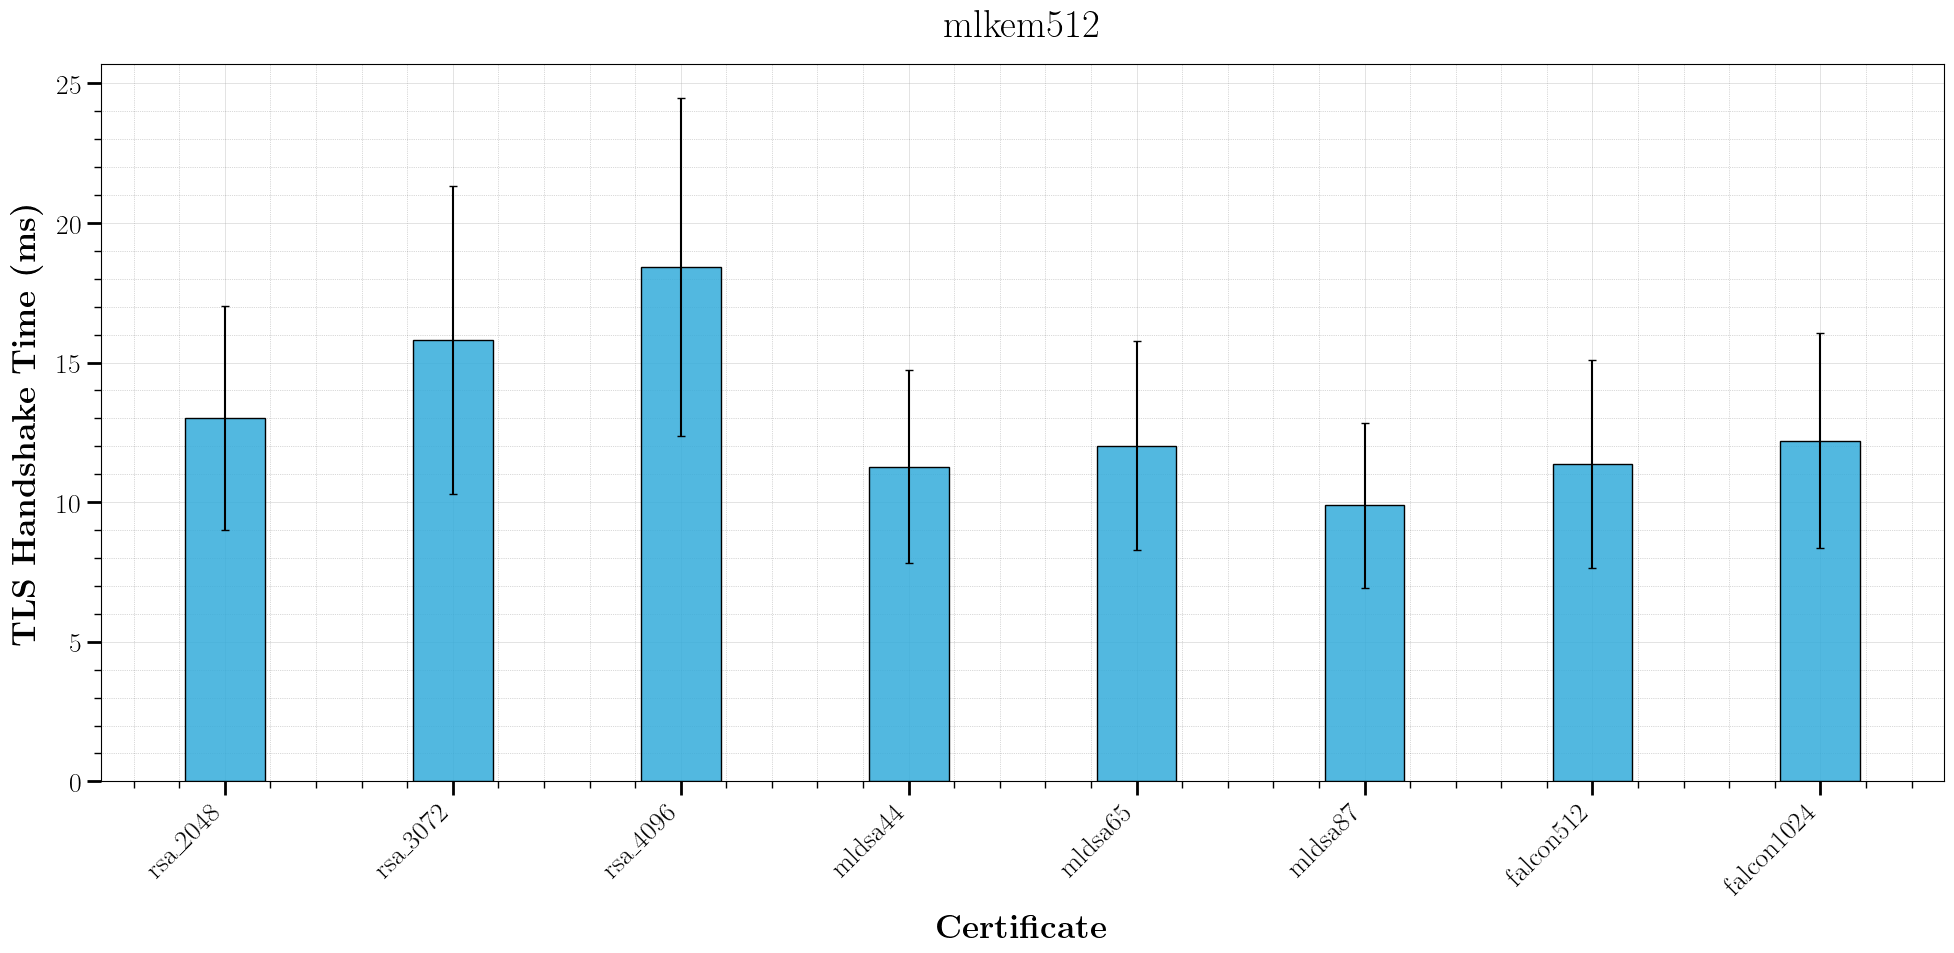

In [39]:
plot_tls_certs_families(input_df=df_tls_kems, kem_type='mlkem512', plot_title="tls_certs_mlkem512.pdf")

In [40]:
merged_df = pd.concat([df_tls_kems, df_tls_qkdkems], keys=['OQS', 'QKD'], names=['Provider'])

merged_df.to_csv("data/tls_comparison_stats.csv")

merged_df

Time_count  Time_mean  Time_std  Time_min  \
Provider KEM        Cert                                                    
OQS      mlkem1024  falcon1024         200     12.455     4.189      7.15   
                    falcon512          200     12.348     4.003      7.46   
                    mldsa44            200     11.478     3.495      6.82   
                    mldsa65            200     11.664     3.726      6.82   
                    mldsa87            200     12.120     3.811      7.27   
...                                    ...        ...       ...       ...   
QKD      qkd_hqc256 mldsa65            200     52.715     4.832     46.63   
                    mldsa87            200     55.968     6.662     45.89   
                    rsa_2048           200     56.659     6.771     46.83   
                    rsa_3072           200     56.684     7.000     47.30   
                    rsa_4096           200     56.291     6.974     47.34   

                                Time_max  
Provider KEM        Cert                  
OQS      mlkem1024  falcon1024     25.34  
                    falcon512      24.31  
                    mldsa44        23.39  
                    mldsa65        24.76  
                    mldsa87        24.47  
...                                  ...  
QKD      qkd_hqc256 mldsa65        83.70  
                    mldsa87        74.28  
                    rsa_2048       83.98  
                    rsa_3072       82.55  
                    rsa_4096       96.50  

[240 rows x 5 columns]

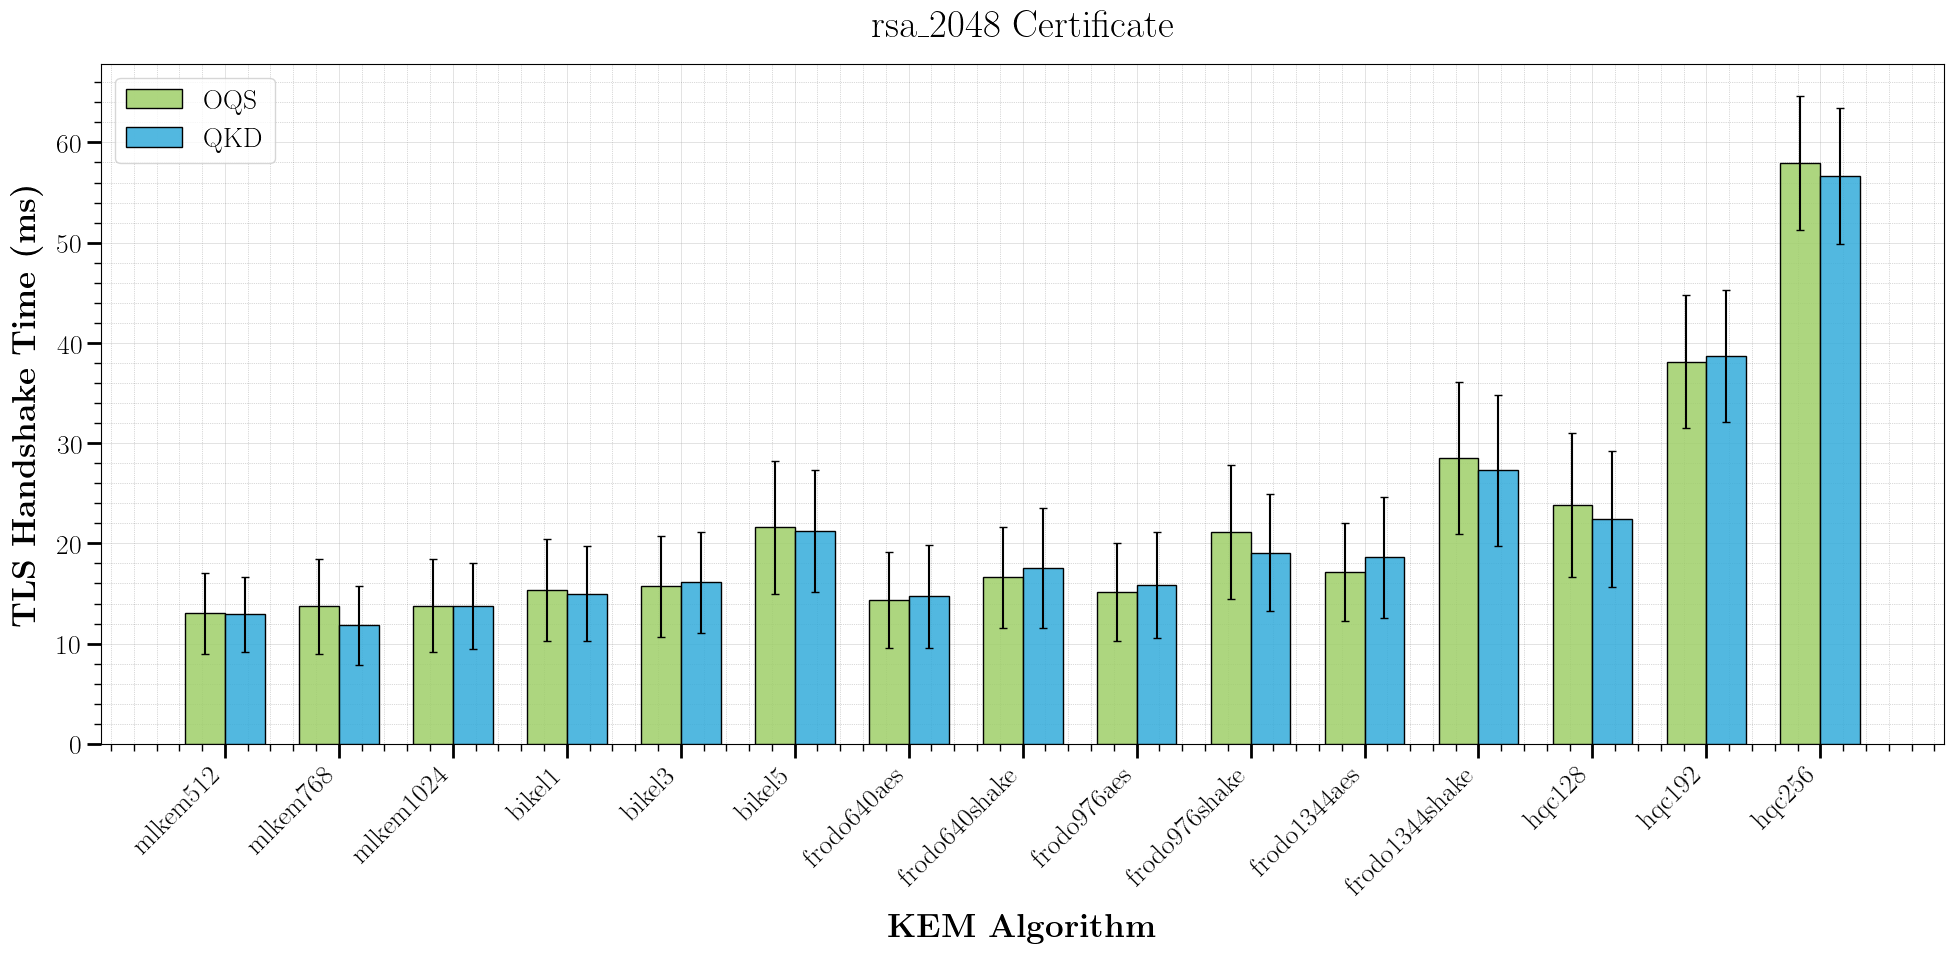

In [41]:
plot_tls_kem_families(input_df=merged_df, cert_type='rsa_2048', plot_title='tls_kems_comparison_rsa2048.pdf')

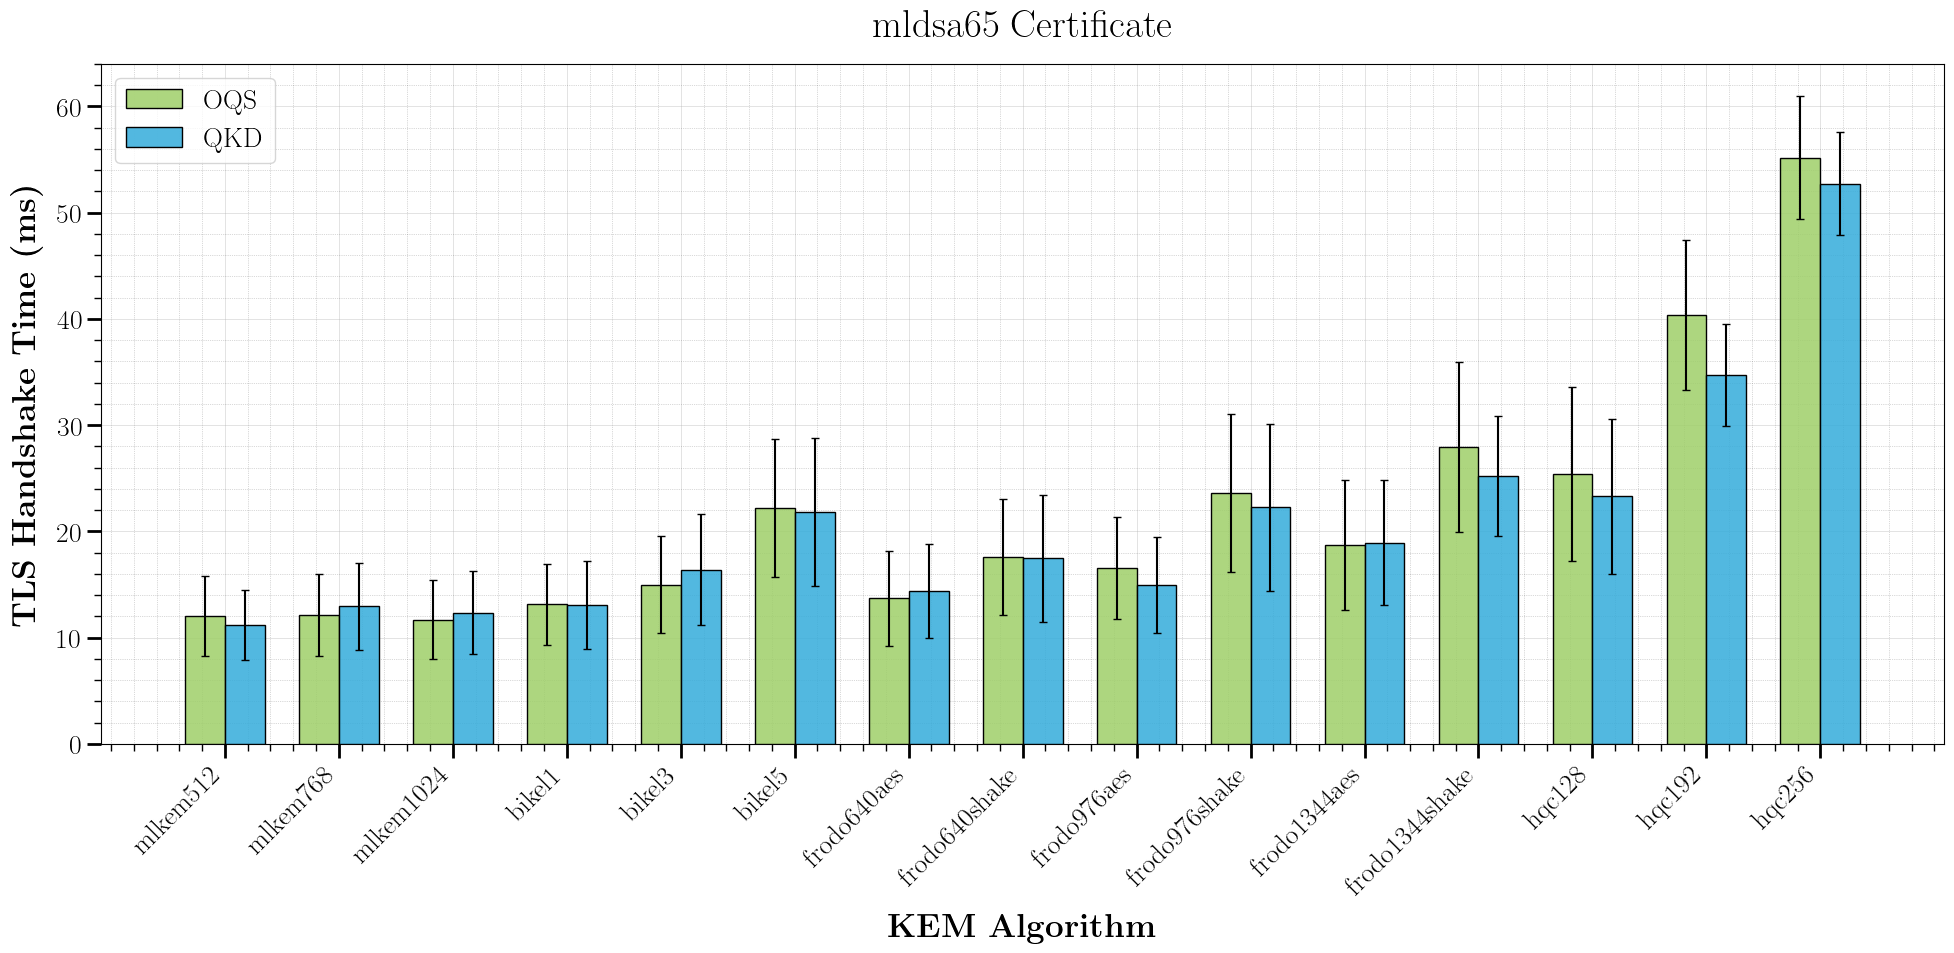

In [42]:
plot_tls_kem_families(input_df=merged_df, cert_type='mldsa65', plot_title='tls_kems_comparison_mldsa65.pdf')